In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [63]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [64]:
df.shape

(35, 34)

In [113]:
df.head()

,STATE/UT,Total Population,Literacy Rate,Literate Population,MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Total Crimes
0,ANDHRA PRADESH,84580777,67.02,56686037,76596,1763,26956,21239,14936,6303,...,11587,530421,6027,50229,34889,119007,17,138435,482252,2018981
1,ARUNACHAL PRADESH,1383727,65.38,904681,1617,35,1000,857,558,299,...,391,6821,115,1173,22,167,0,745,7396,27652
2,ASSAM,31205576,72.19,22527305,25416,664,32351,27939,22920,5019,...,8054,69114,1339,13367,115,39388,11,30205,181354,597764
3,BIHAR,104099452,61.80,64333461,112179,3387,26246,37220,19389,17831,...,8282,188557,13392,7898,309,25680,437,44442,538591,1346293
4,CHHATTISGARH,25545198,70.28,17953165,26694,322,23676,3345,2630,715,...,3233,85189,1133,18876,1706,9573,5,25432,245855,561027


In [114]:
df.isnull().sum()

STATE/UT                                               0
Total Population                                       0
Literacy Rate                                          0
Literate Population                                    0
MURDER                                                 0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                                             0
OTHER THEFT                                            0
RIOTS                          

In [115]:
#checking total crimes in states
x= pd.DataFrame(df.groupby(['STATE/UT'])['Total Crimes'].sum().reset_index())
x.columns=['STATE/UT','Total']
x

,STATE/UT,Total
0,A & N ISLANDS,9102
1,ANDHRA PRADESH,2018981
2,ARUNACHAL PRADESH,27652
3,ASSAM,597764
4,BIHAR,1346293
5,CHANDIGARH,40807
6,CHHATTISGARH,561027
7,D & N HAVELI,4651
8,DAMAN & DIU,2948
9,DELHI UT,1266348


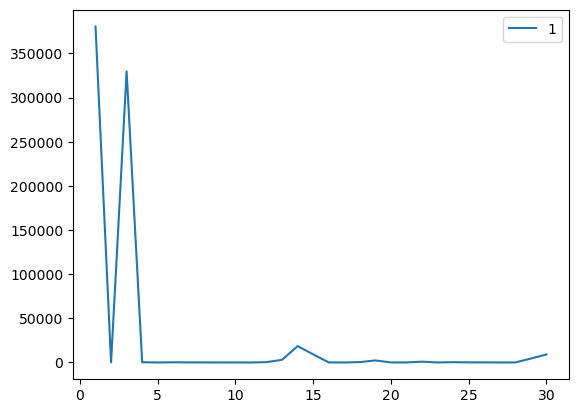

In [116]:
t=df[df['STATE/UT']=='A & N ISLANDS']
x=pd.DataFrame([t.iloc[0].index,t.iloc[0].values]).T
x.iloc[1:].plot()
plt.show() 

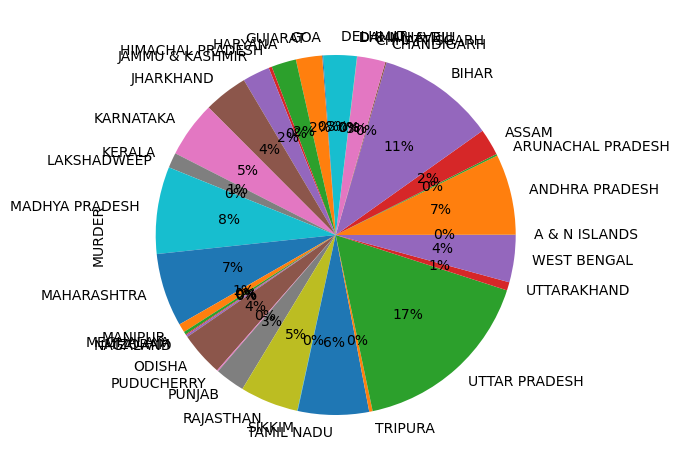

In [117]:
df.groupby("STATE/UT")["MURDER"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

<Axes: xlabel='STATE/UT'>

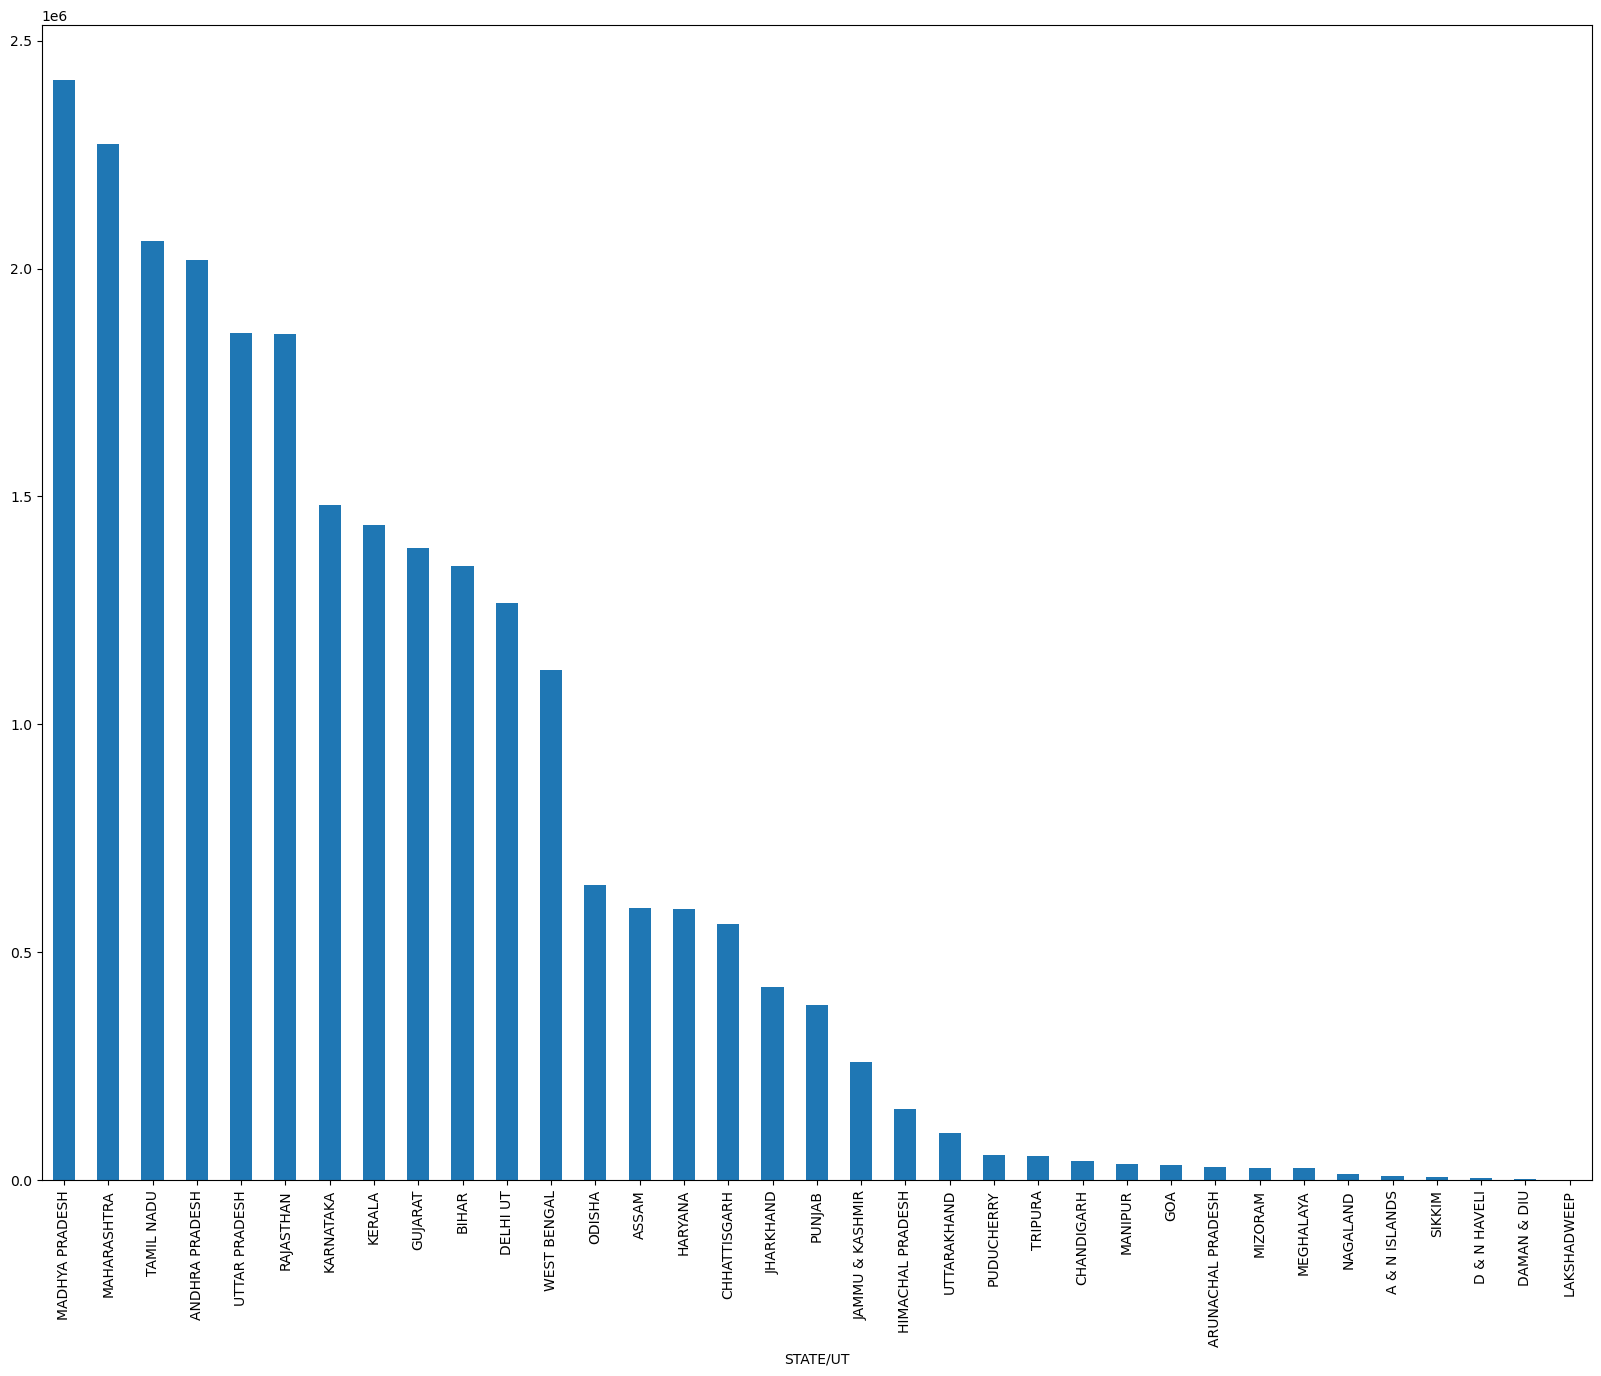

In [123]:
#state wise analysis of total crime
plt.figure(figsize=(20,15))
df.groupby("STATE/UT")["Total Crimes"].sum().sort_values(ascending=False).plot.bar()


In [125]:
crimes=['MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes
df_state["Total"]=df_state.sum(axis=1)
df_state=df_state.sort_values(by="Total",ascending=False)
df_state.reset_index()
df_state

,MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Total
STATE/UT,,,,,,,,,,,,,,,,,,,,,
MADHYA PRADESH,82651,1720,72173,11958,9243,2715,2116,1541,23730,141479,...,10733,417487,9096,80349,9297,39969,60,64969,1196582,2687087
MAHARASHTRA,69609,1238,35970,15101,10853,4248,7702,3657,36179,180438,...,14099,345823,4158,38050,12082,80363,2,134613,560060,2531008
UTTAR PRADESH,176861,15856,38114,59266,47590,11676,4622,938,29646,62740,...,4464,134720,23062,28477,25576,77617,3,113821,626949,2172417
ANDHRA PRADESH,76596,1763,26956,21239,14936,6303,1936,80,7399,94970,...,11587,530421,6027,50229,34889,119007,17,138435,482252,2164950
TAMIL NADU,67413,299,13902,15303,12436,2867,1224,307,10985,49859,...,8108,272942,2129,18705,9534,18188,15,140193,1186115,2134619
RAJASTHAN,55452,791,31596,30727,24671,6056,535,781,8733,62264,...,8159,263588,4894,29905,354,100101,6,78350,784991,2067266
DELHI UT,31762,1602,25696,50166,31300,18866,756,2482,12739,46485,...,1135,43533,3140,14827,3279,30422,1,15006,474914,1828529
KARNATAKA,53115,786,10346,10029,5315,4714,2593,2713,17546,74720,...,3862,263769,2897,25281,1046,30052,45,5078,681336,1623630
KERALA,14393,1790,14894,2891,1898,993,1313,1779,8060,45081,...,5451,220103,316,30111,3126,46074,0,489,829883,1480226


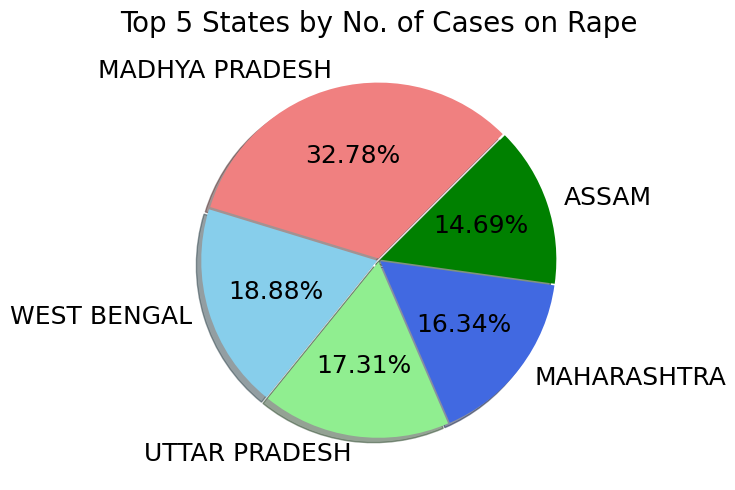

In [126]:
#TOP 5 states with Rape
x=df_state.sort_values(by="RAPE",ascending=False)
top_3rape=x.iloc[:,0:4].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3rape.RAPE,labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Rape",fontdict={'fontsize' : 20})
plt.tight_layout()

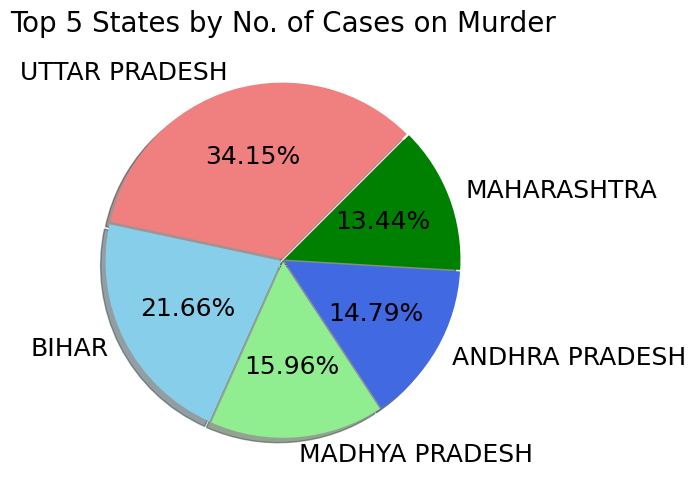

In [127]:
x=df_state.sort_values(by="MURDER",ascending=False)
top_3rape=x.iloc[:,0:1].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3rape.MURDER,labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Murder",fontdict={'fontsize' : 20})
plt.tight_layout()

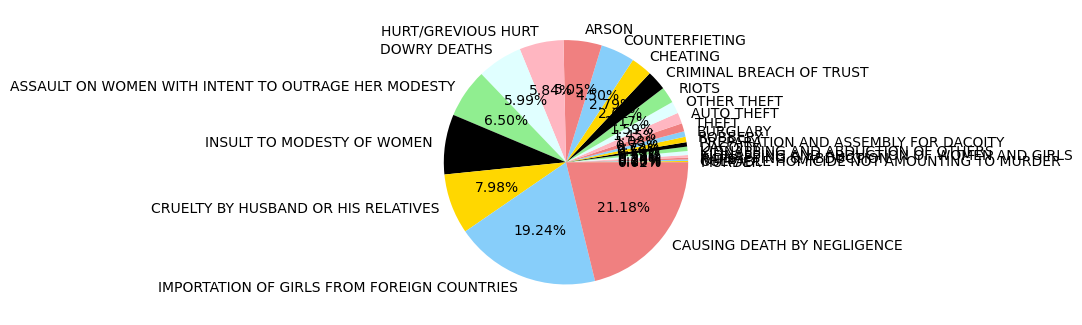

In [122]:
crimes=[ 'MURDER',
        'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE','KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE']
a=[]
for i in crimes:
  a.append(df[i].sum())
a.sort()
plt.figure(figsize=(10,15))
plt.pie(a,labels=crimes,autopct='%1.2f%%',colors=['black', 'gold', 'lightskyblue', 'lightcoral','lightpink','lightcyan','lightgreen'])
plt.tight_layout()

In [65]:
df.columns

Index(['STATE/UT', 'Total Population', 'Literacy Rate', 'Literate Population',
       'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'Total Crimes'],
      dtype='object')

#Adding Columns with same type of crime in order to reduce columns-and drop added columns
df['MURDER'] = df['MURDER']+df['ATTEMPT TO MURDER']
df['RAPE'] = df['RAPE']+df['CUSTODIAL RAPE']


df.drop(['ATTEMPT TO MURDER'],axis=1,inplace=True)
df.drop(['CUSTODIAL RAPE'],axis=1,inplace=True)

In [67]:
#Adding Columns with same type of crime in order to reduce columns-and drop added columns
df['MURDER'] = df['MURDER']+df['ATTEMPT TO MURDER']
df['RAPE'] = df['RAPE']+df['CUSTODIAL RAPE']+df['OTHER RAPE']


df.drop(['ATTEMPT TO MURDER'],axis=1,inplace=True)
df.drop(['CUSTODIAL RAPE'],axis=1,inplace=True)
df.drop(['OTHER RAPE'],axis=1,inplace=True)

In [68]:
df.shape


(35, 31)

In [69]:
df.columns

Index(['STATE/UT', 'Total Population', 'Literacy Rate', 'Literate Population',
       'MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'Total Crimes'],
      dtype='object')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

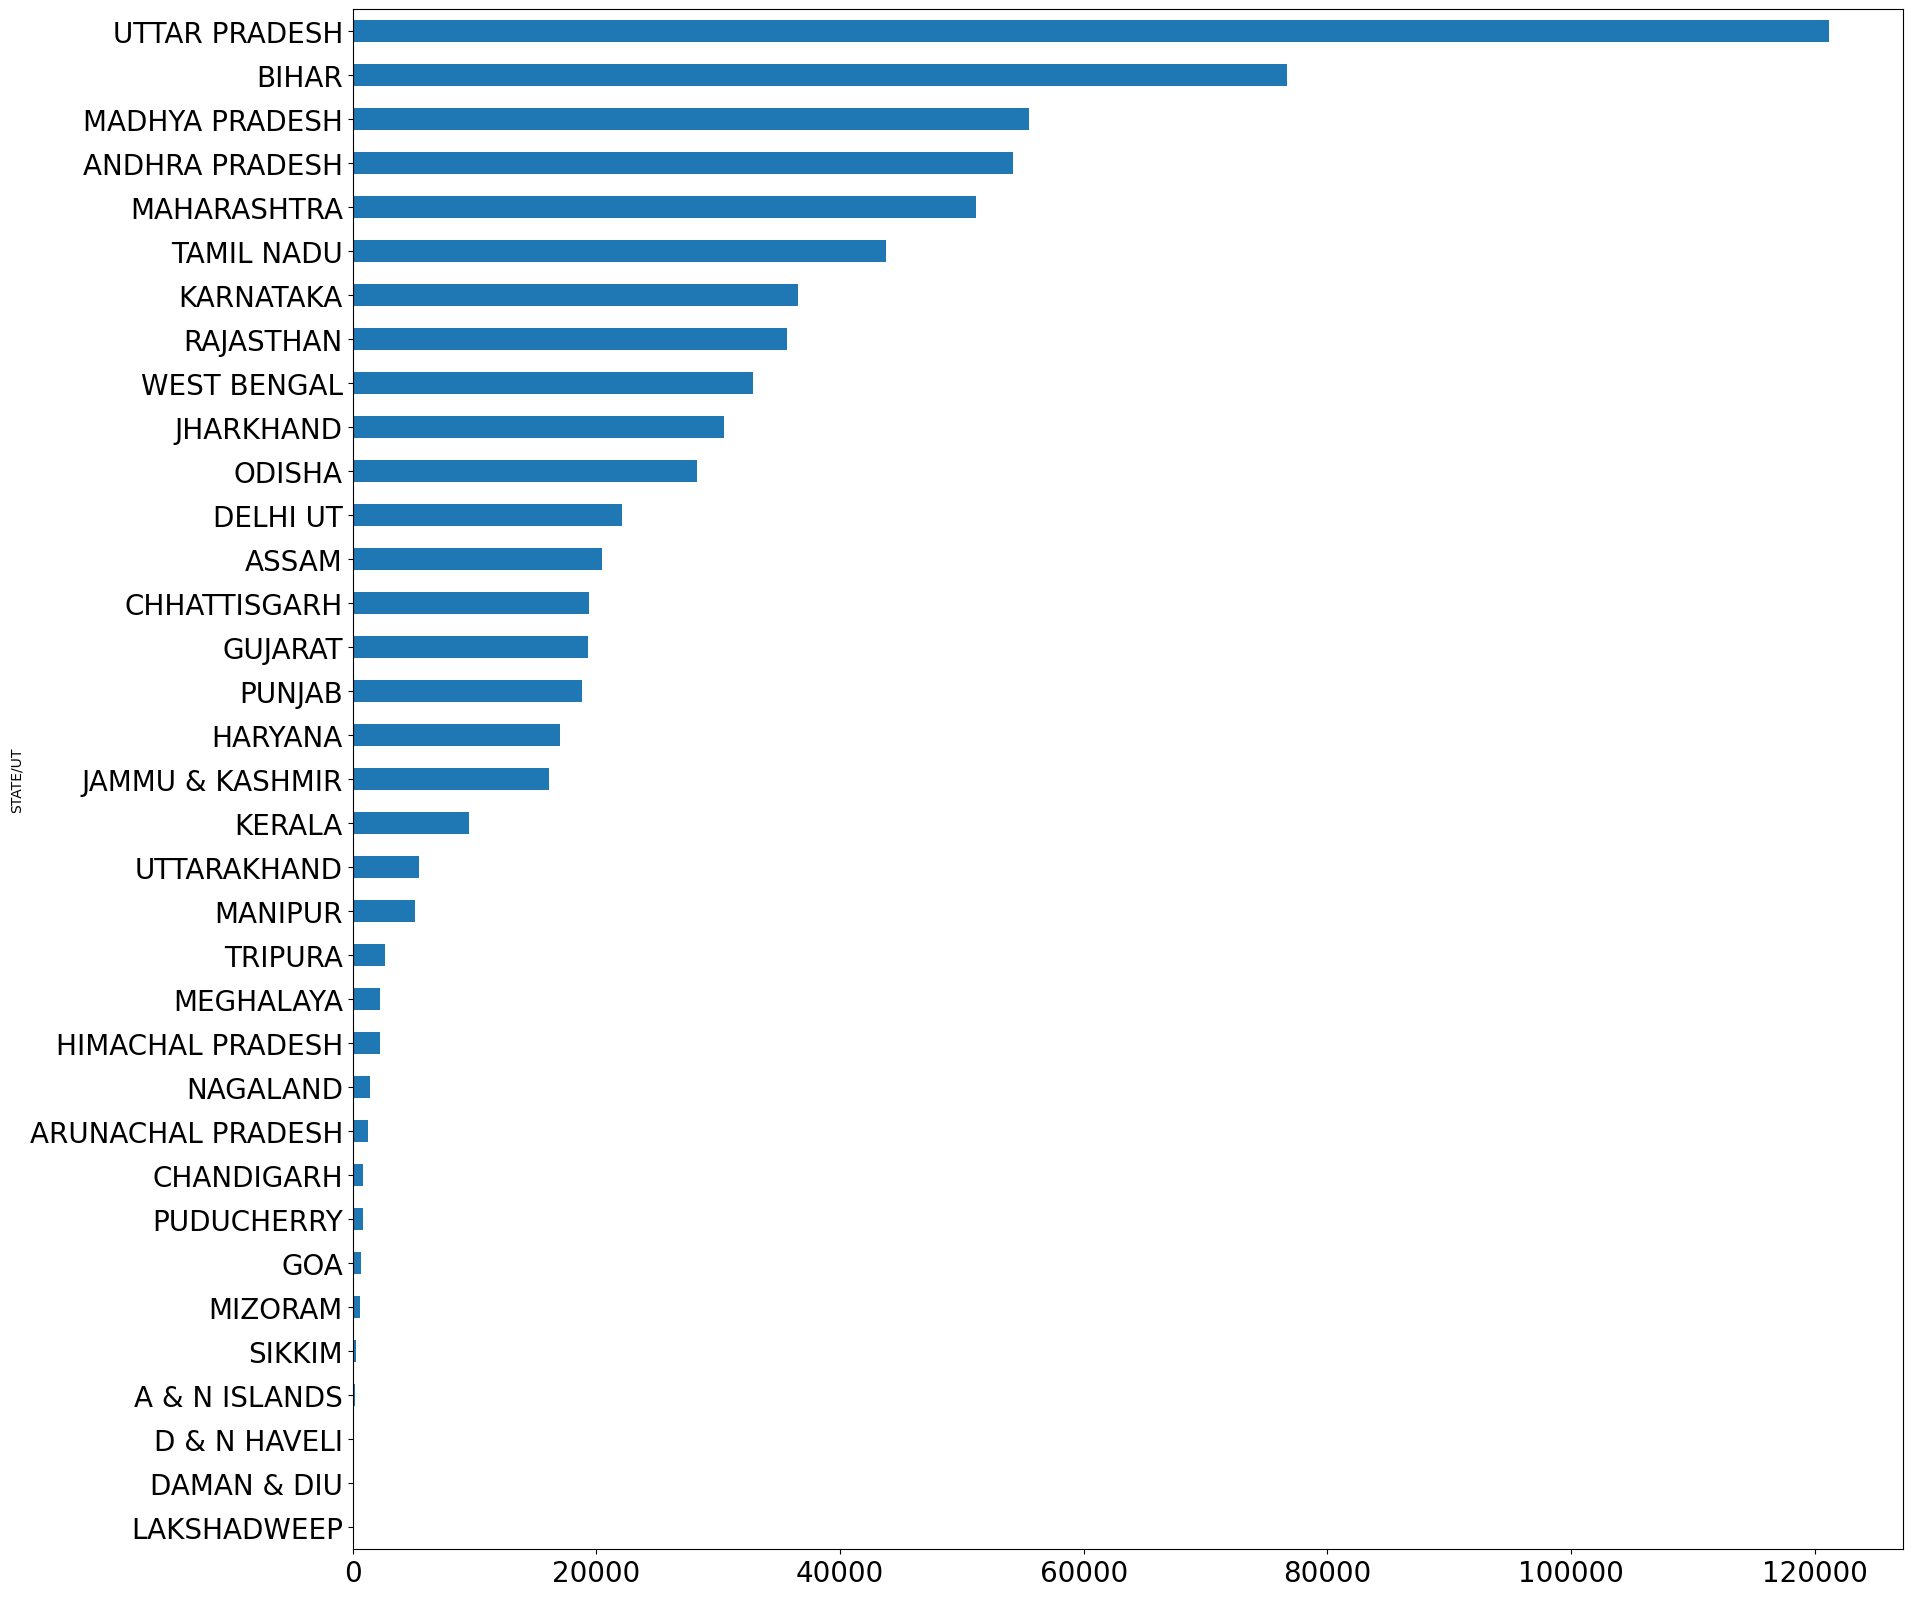

In [27]:
# A bar chart to show states and Murders
fig = plt.figure(figsize=(20,20))
states = df.groupby('STATE/UT')['MURDER'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Murder Analysis', fontsize = 20)
plt.show ()


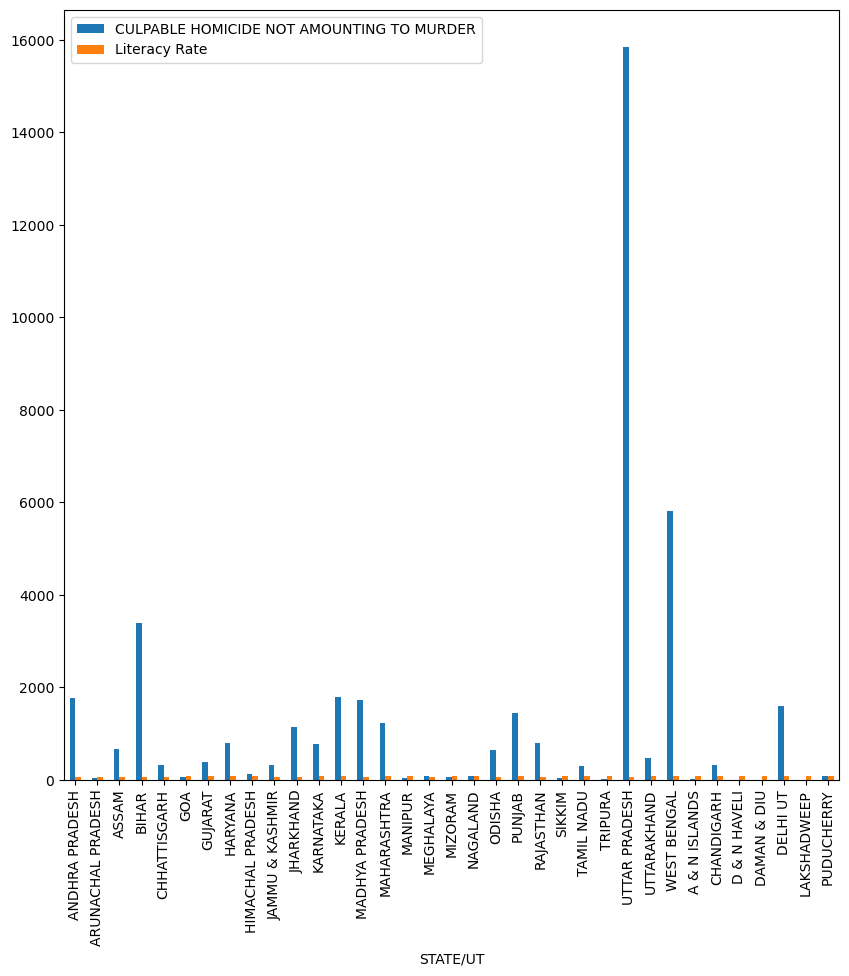

In [31]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

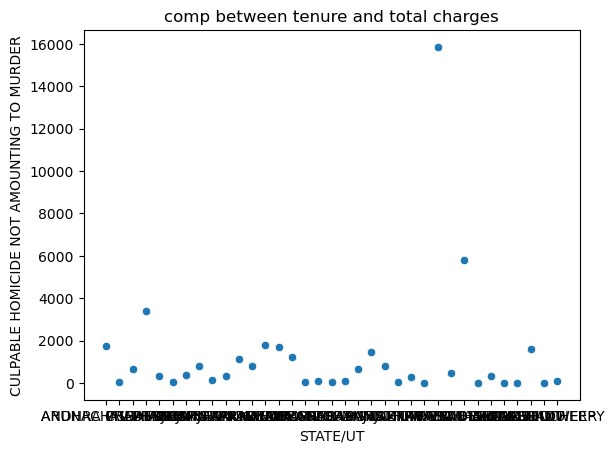

In [41]:
import seaborn as sns
plt.title('comp between tenure and total charges')
sns.scatterplot(x='STATE/UT',y="CULPABLE HOMICIDE NOT AMOUNTING TO MURDER",data=df,palette='bright')
plt.show()

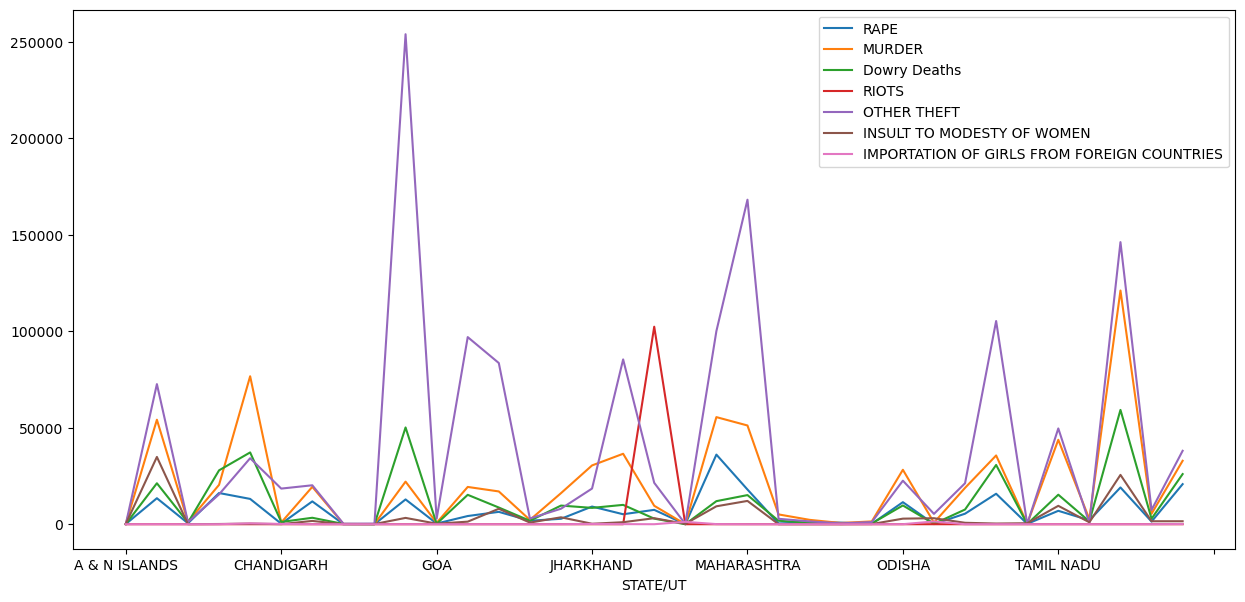

In [48]:
#TOP 5 STATES WITH CRIME
plt.figure(figsize=(15,7))
df.groupby("STATE/UT")["RAPE"].sum().plot()
df.groupby("STATE/UT")["MURDER"].sum().plot()
df.groupby("STATE/UT")["KIDNAPPING & ABDUCTION"].sum().plot(label="Dowry Deaths")
df.groupby("STATE/UT")["RIOTS"].sum().plot()
df.groupby("STATE/UT")["OTHER THEFT"].sum().plot()
df.groupby("STATE/UT")["INSULT TO MODESTY OF WOMEN"].sum().plot()
df.groupby("STATE/UT")["IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES"].sum().plot()
plt.legend()
plt.show()

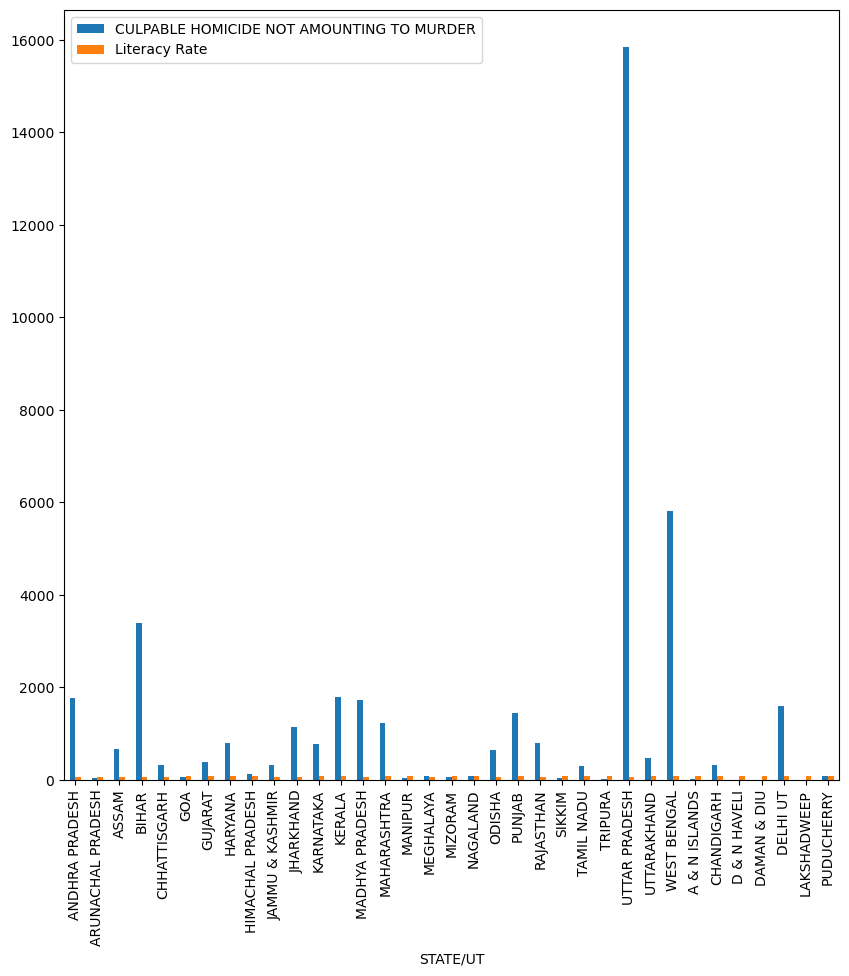

In [49]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

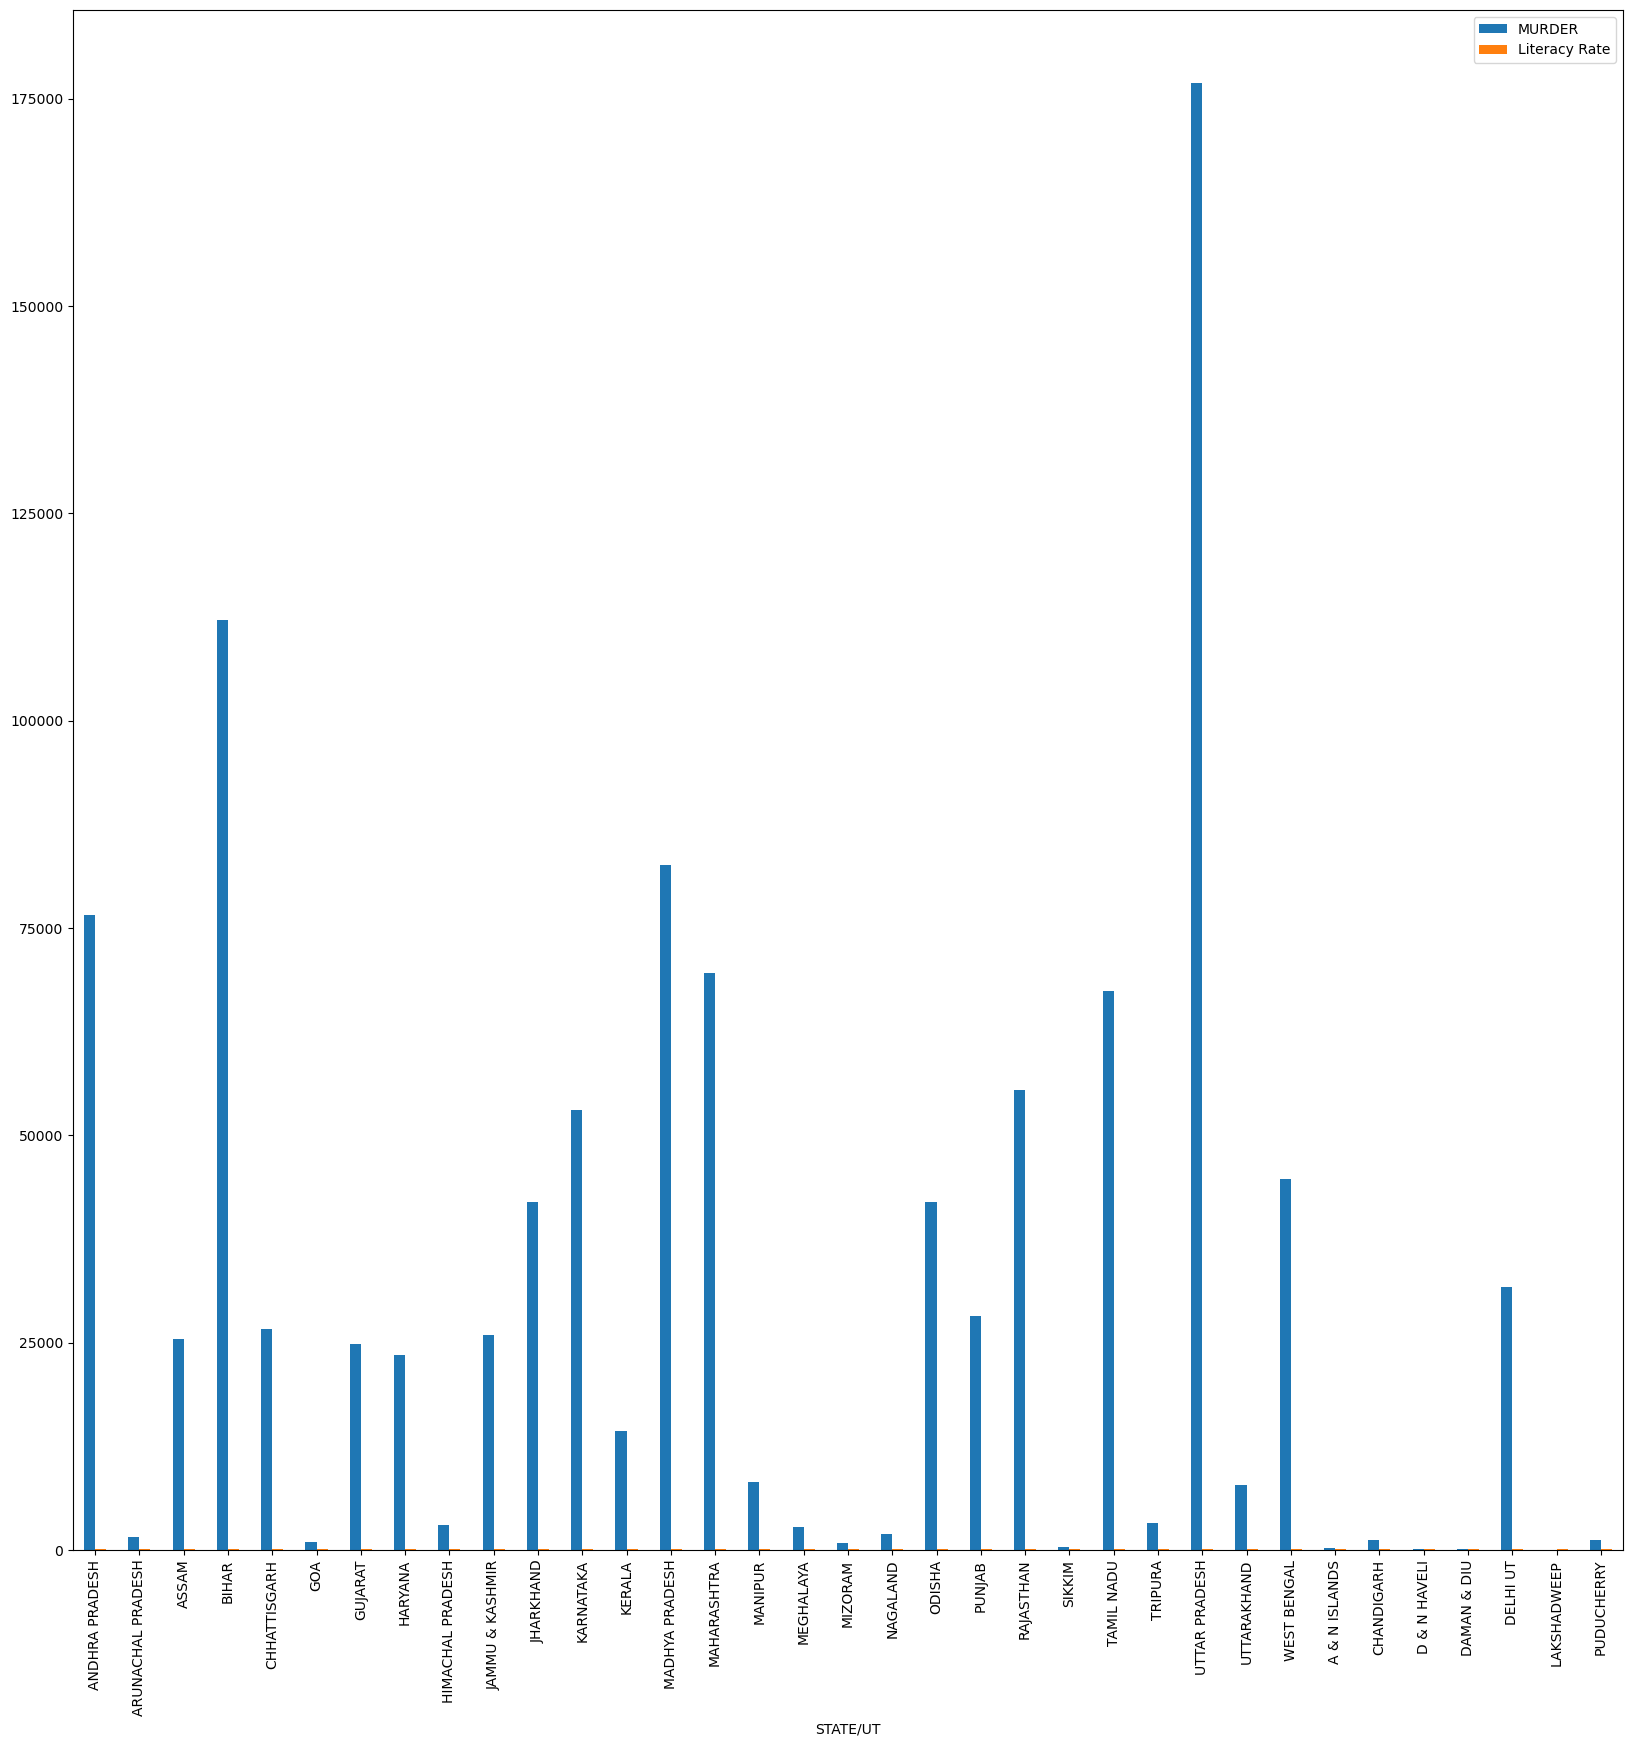

In [74]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["MURDER",'Literacy Rate'], kind="bar", figsize=(20, 20))
 
# Display plot
plt.show()

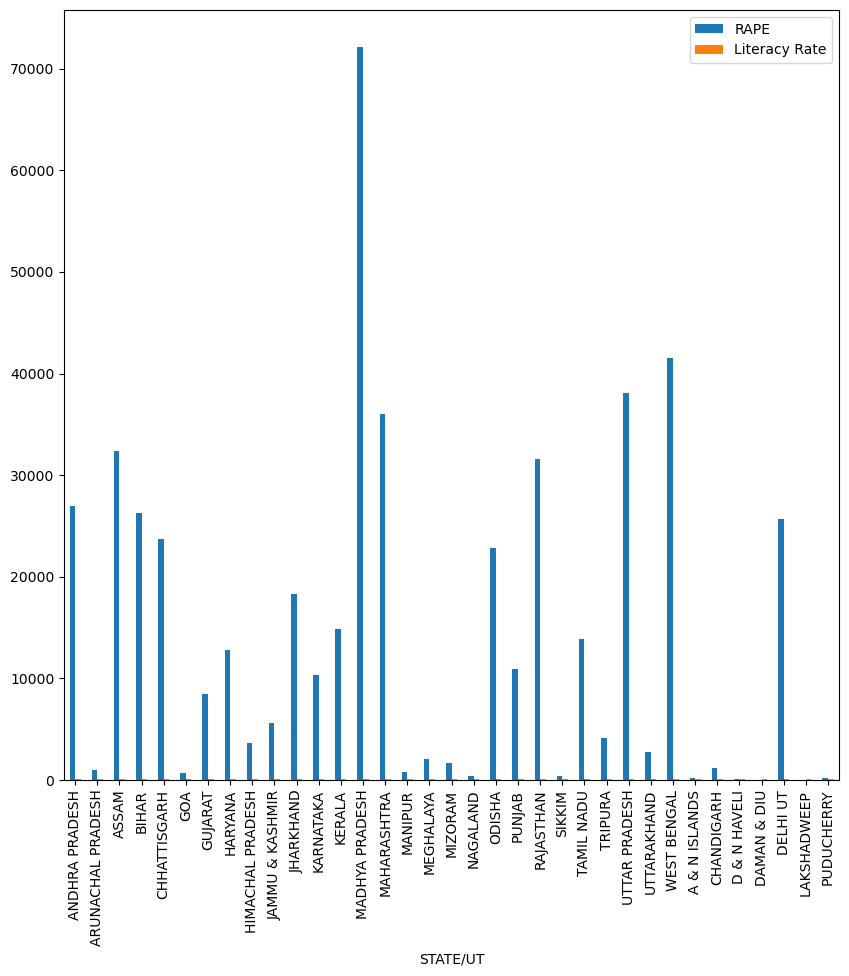

In [76]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["RAPE",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

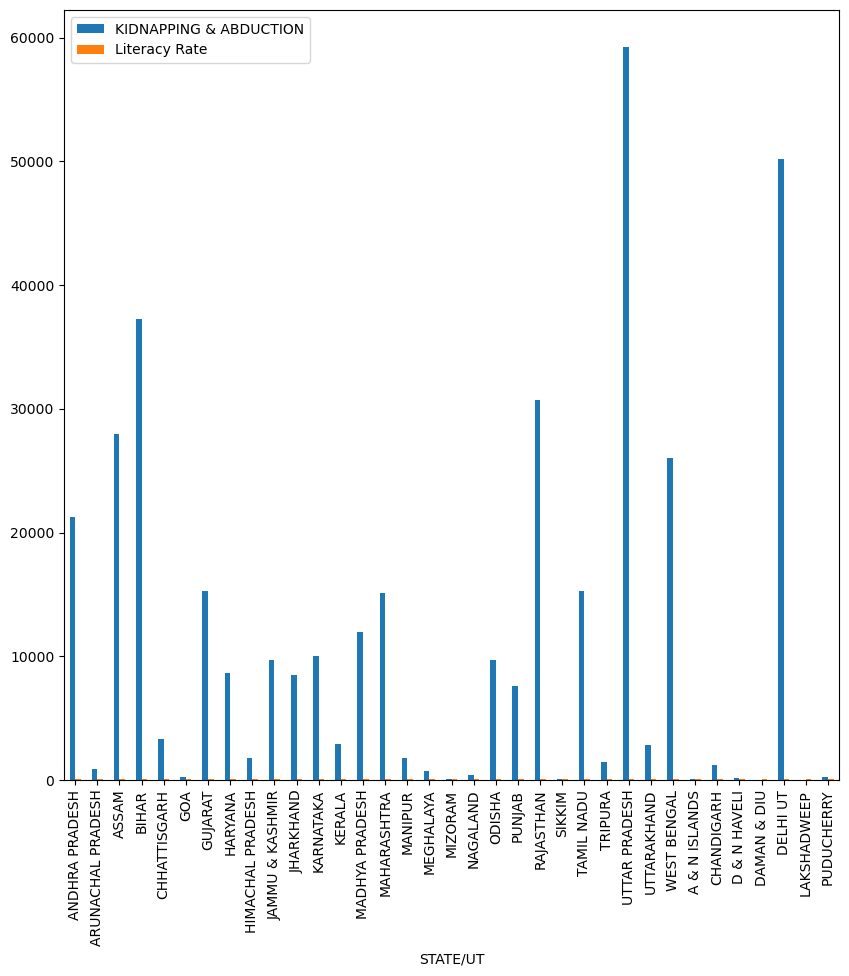

In [77]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["KIDNAPPING & ABDUCTION",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

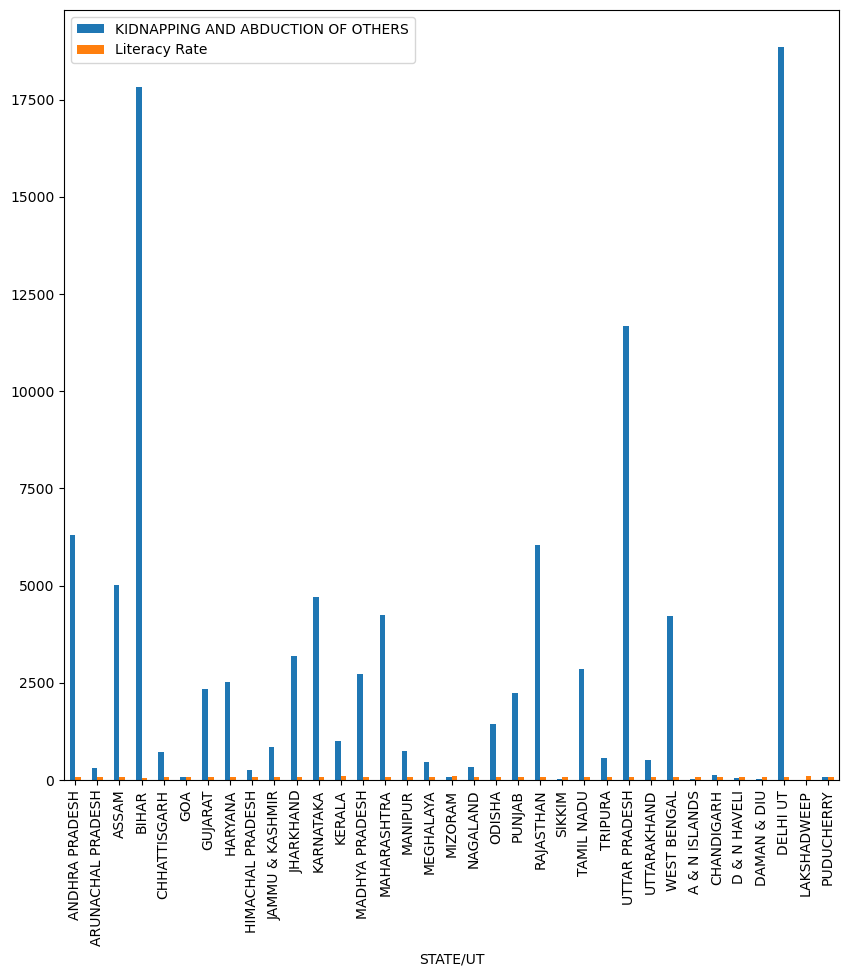

In [79]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["KIDNAPPING AND ABDUCTION OF OTHERS",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

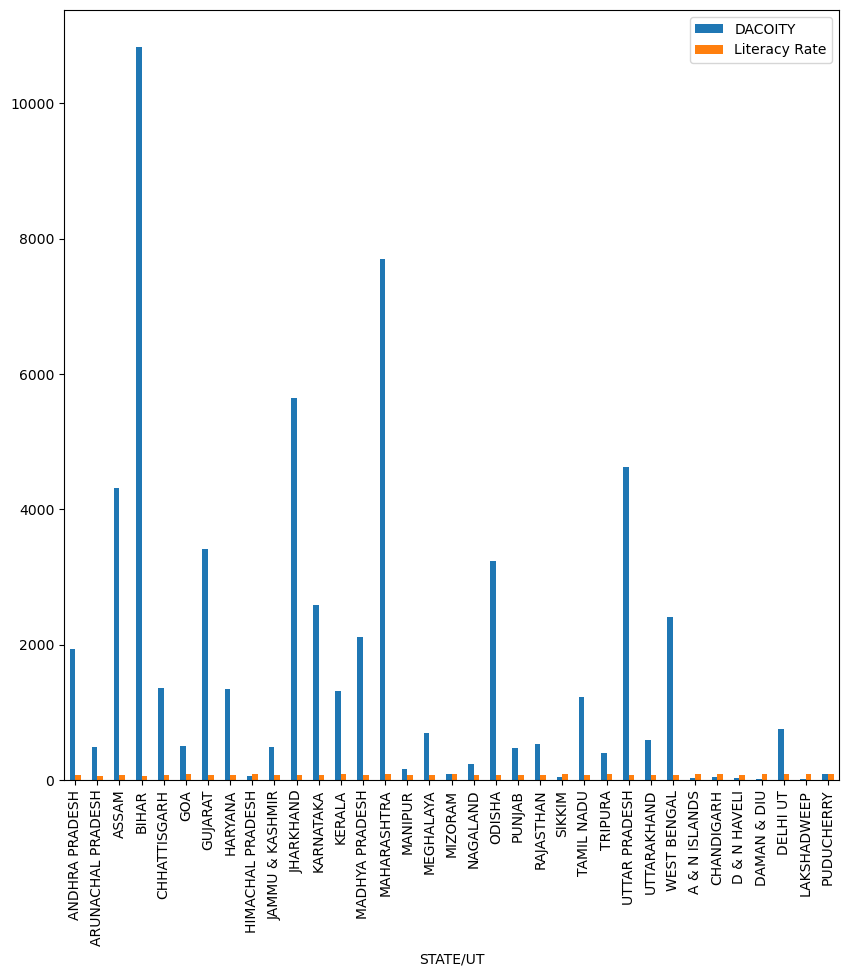

In [80]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["DACOITY",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

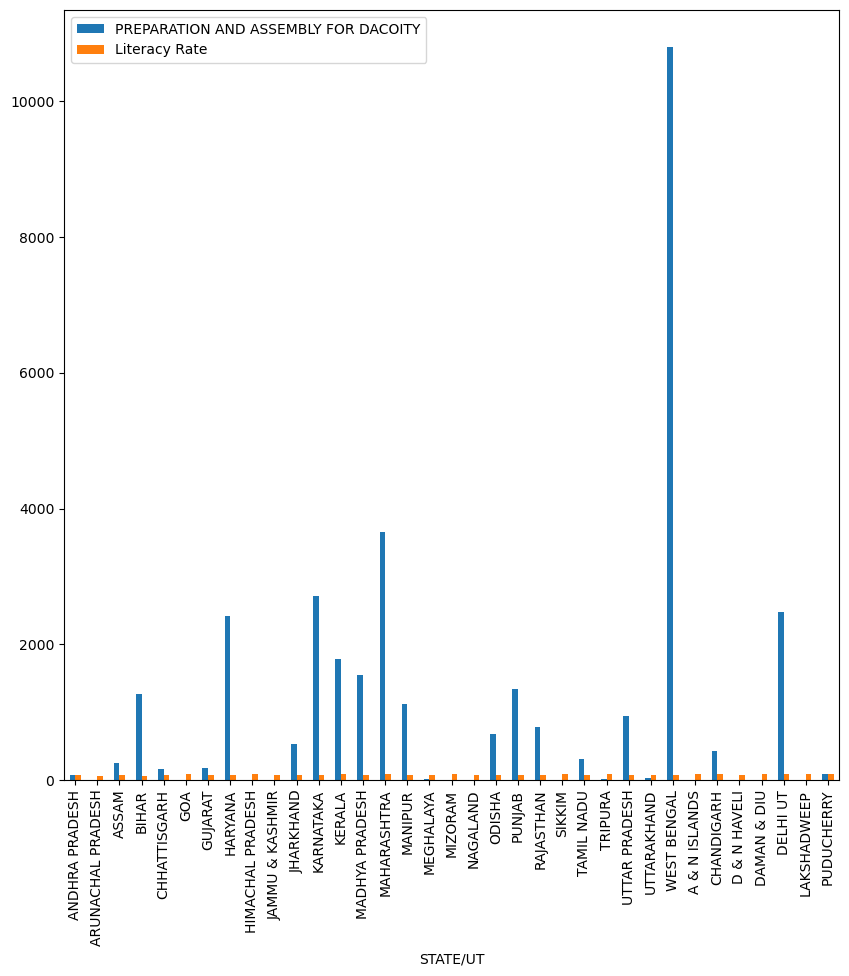

In [82]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["PREPARATION AND ASSEMBLY FOR DACOITY",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

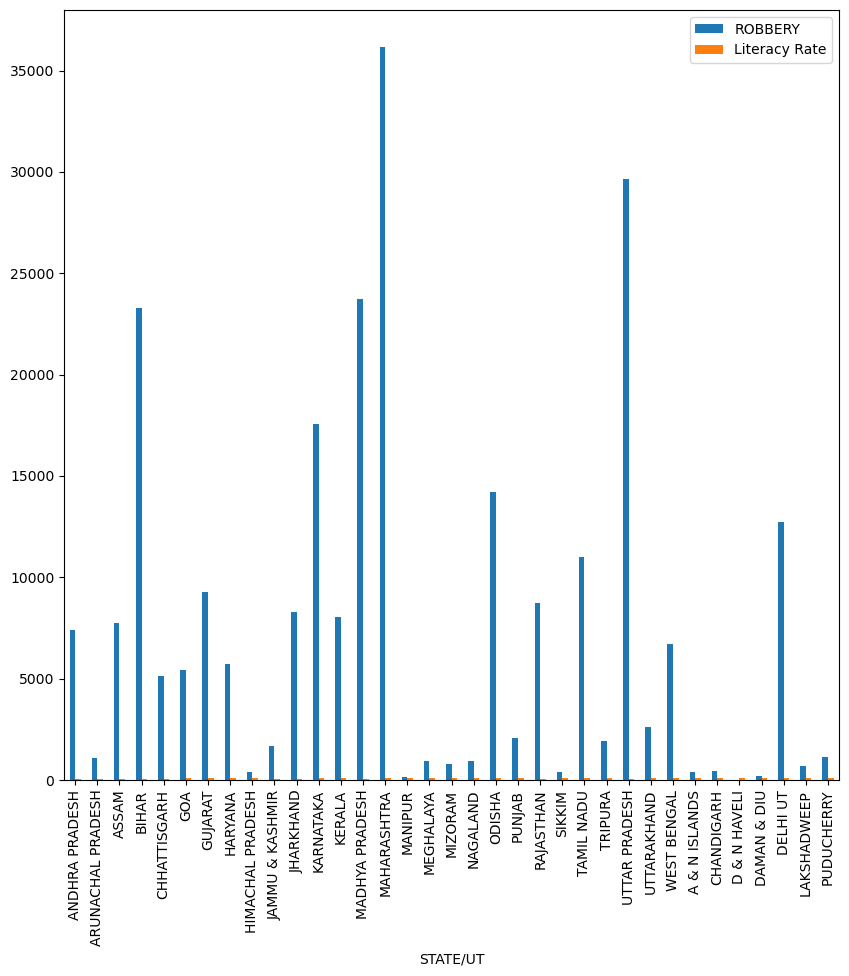

In [83]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["ROBBERY",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plo
plt.show()

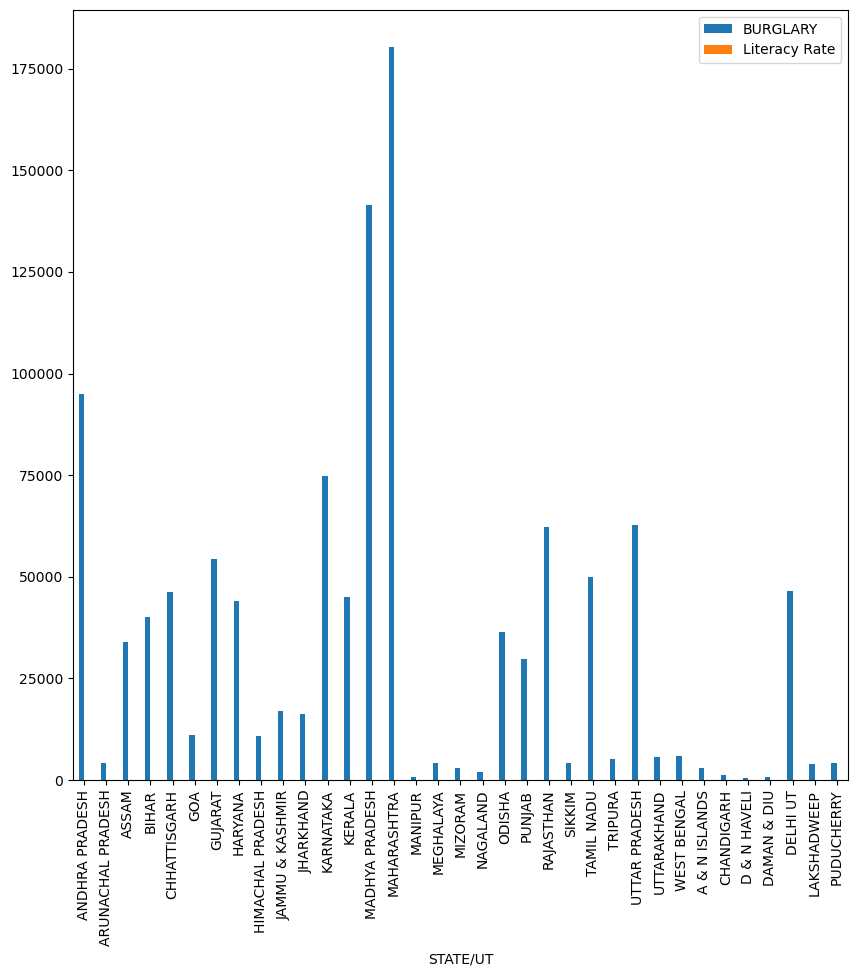

In [84]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["BURGLARY",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

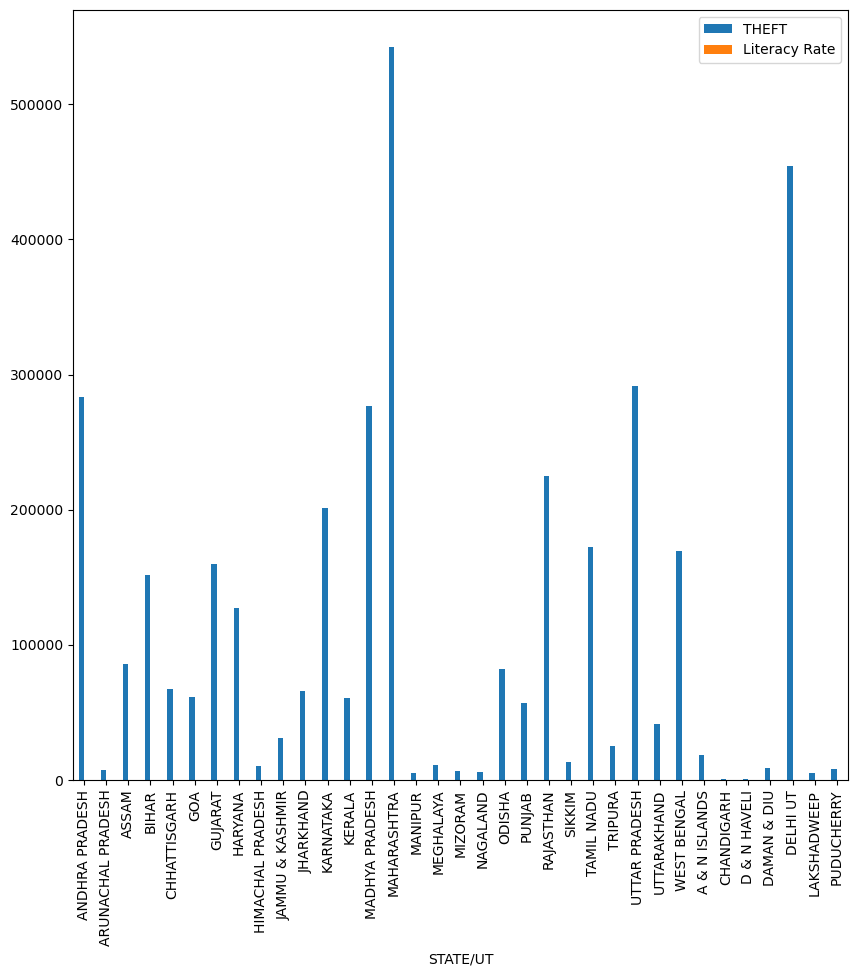

In [85]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["THEFT",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

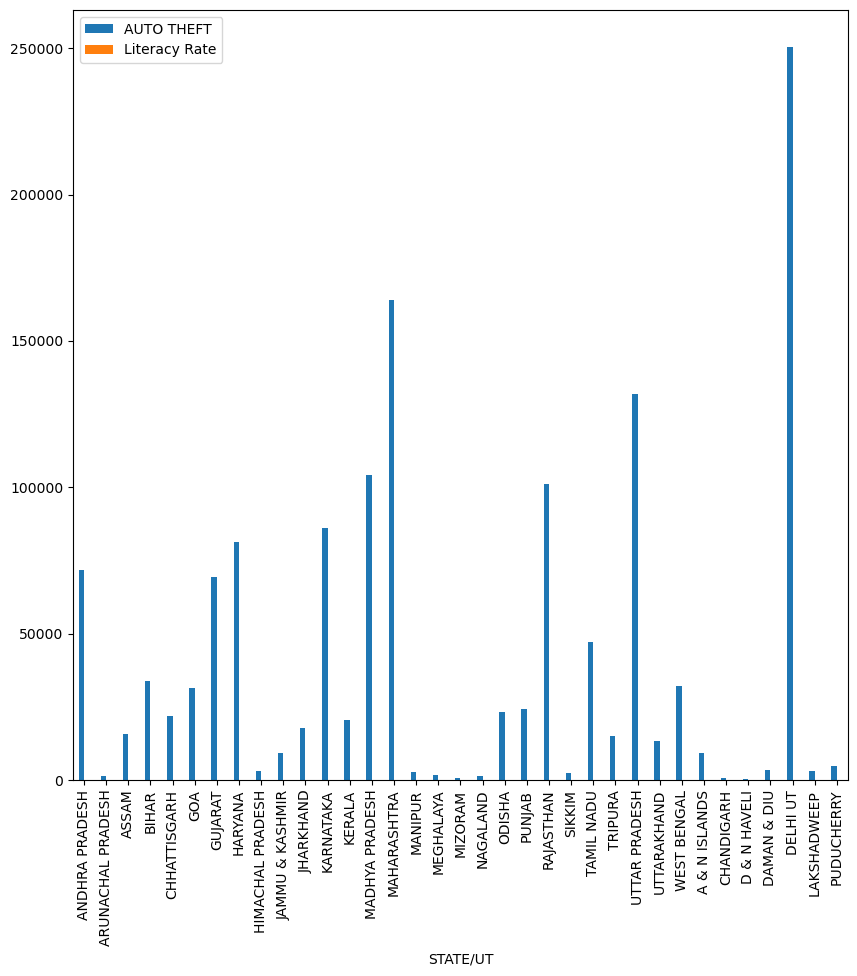

In [87]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["AUTO THEFT",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

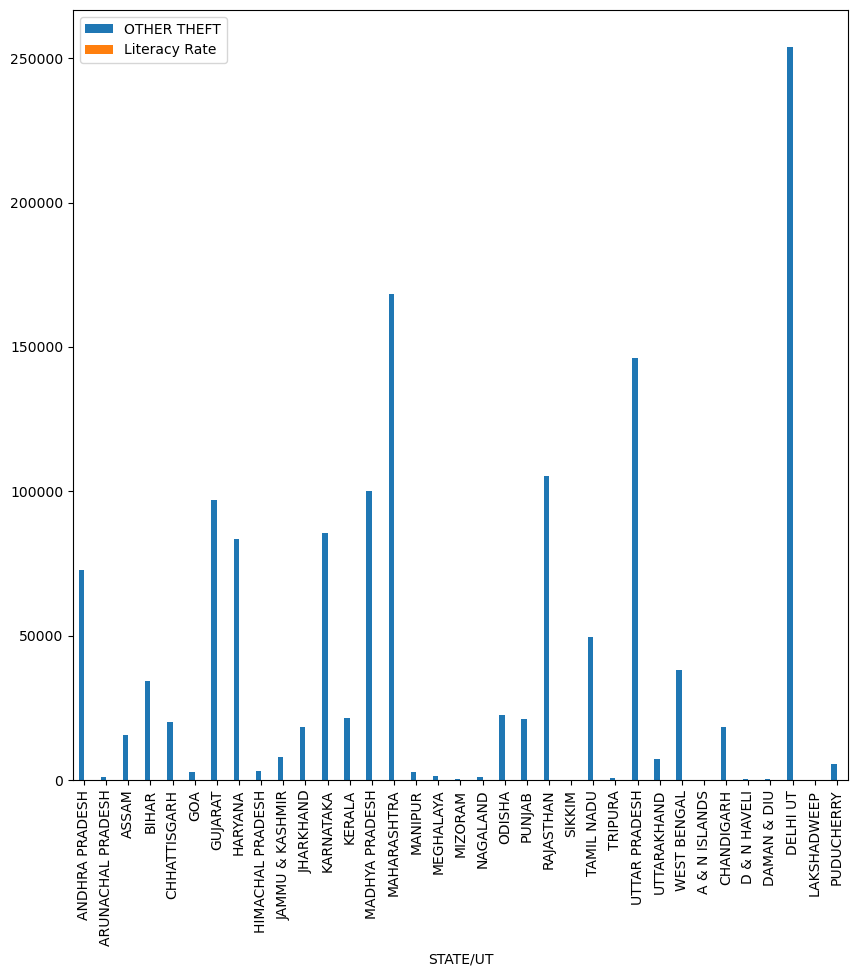

In [88]:
# Plotting Graph for States VS literacy rate VS type of crime
df.plot(x='STATE/UT', y=["OTHER THEFT",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

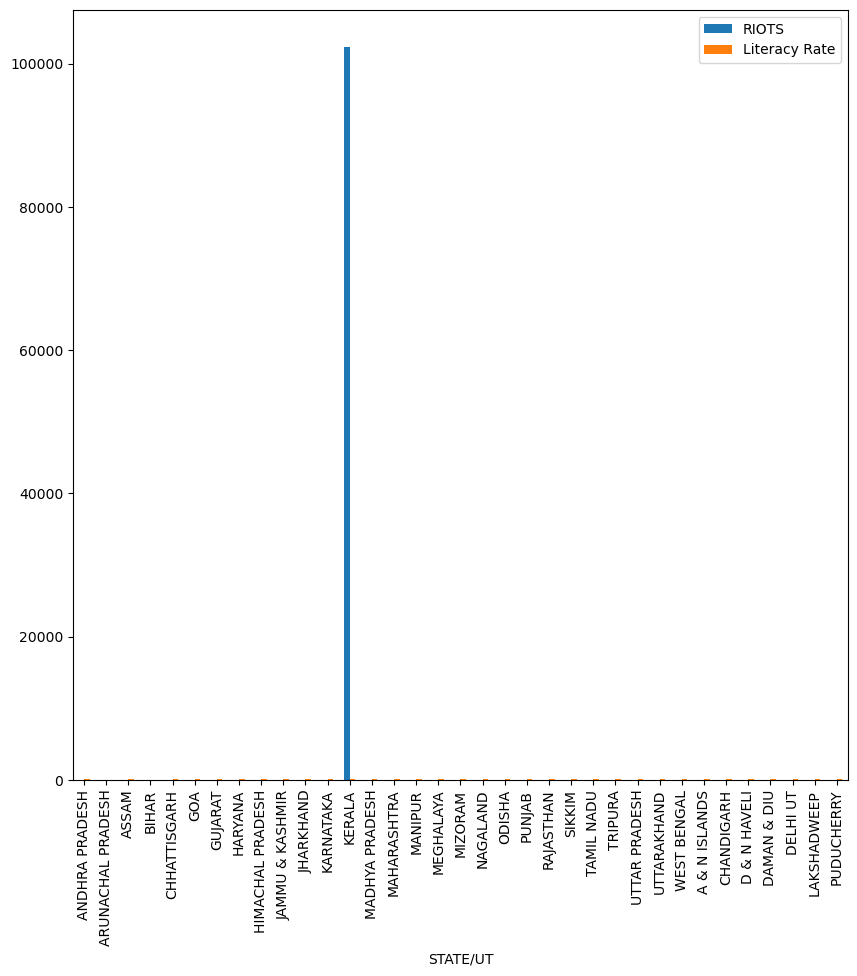

In [89]:

df.plot(x='STATE/UT', y=['RIOTS','Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

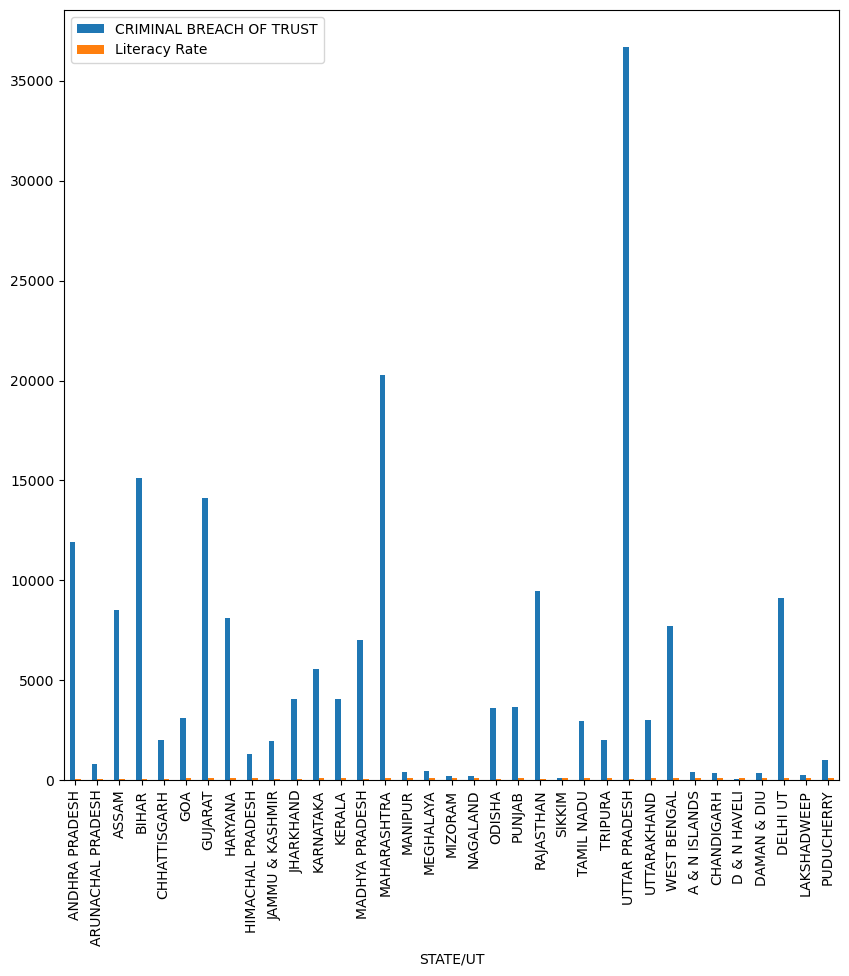

In [90]:

df.plot(x='STATE/UT', y=['CRIMINAL BREACH OF TRUST','Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

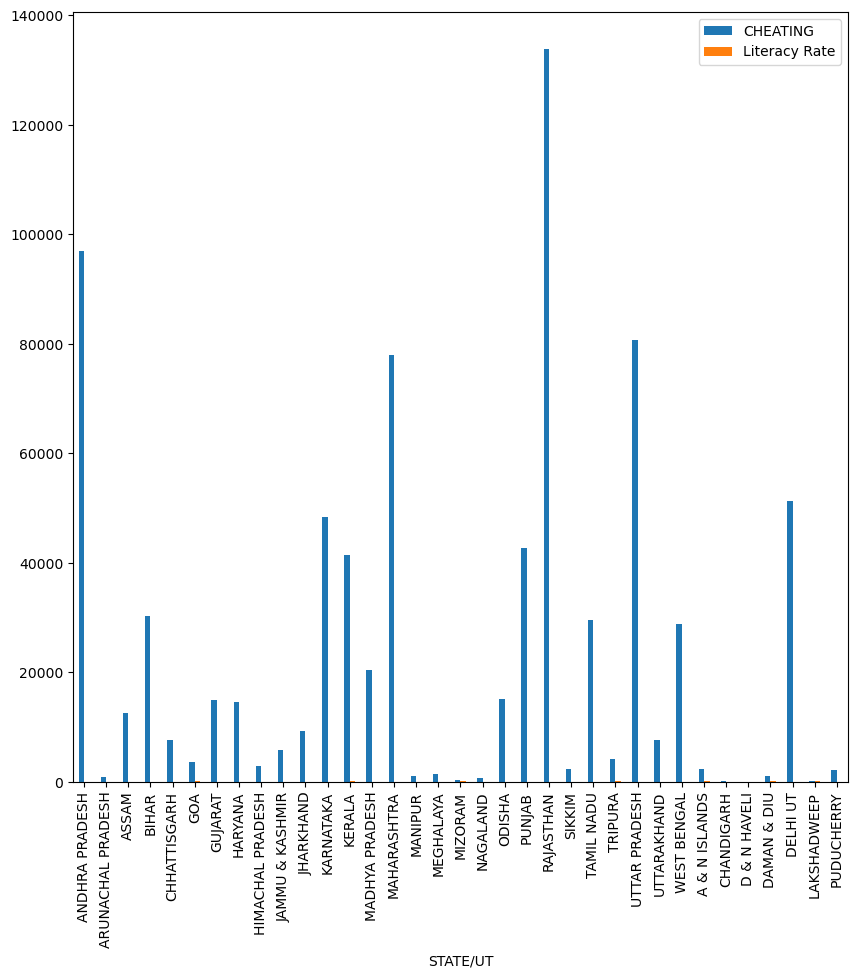

In [91]:
df.plot(x='STATE/UT', y=['CHEATING','Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

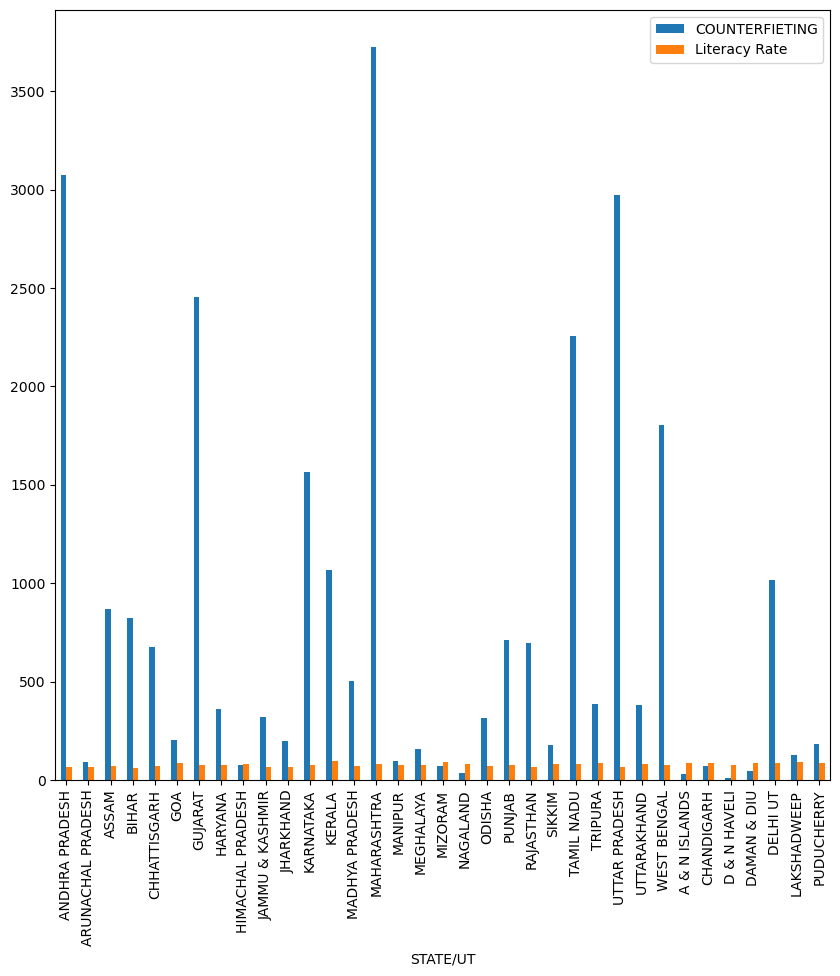

In [92]:
df.plot(x='STATE/UT', y=['COUNTERFIETING','Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

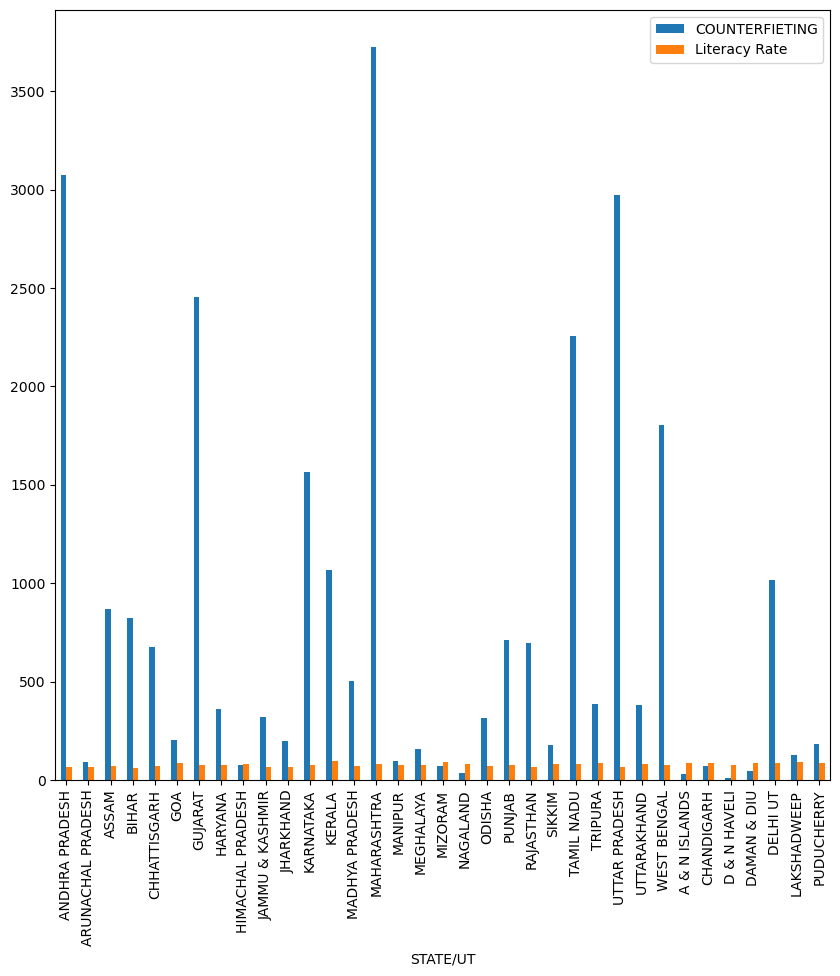

In [94]:
df.plot(x='STATE/UT', y=["COUNTERFIETING",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

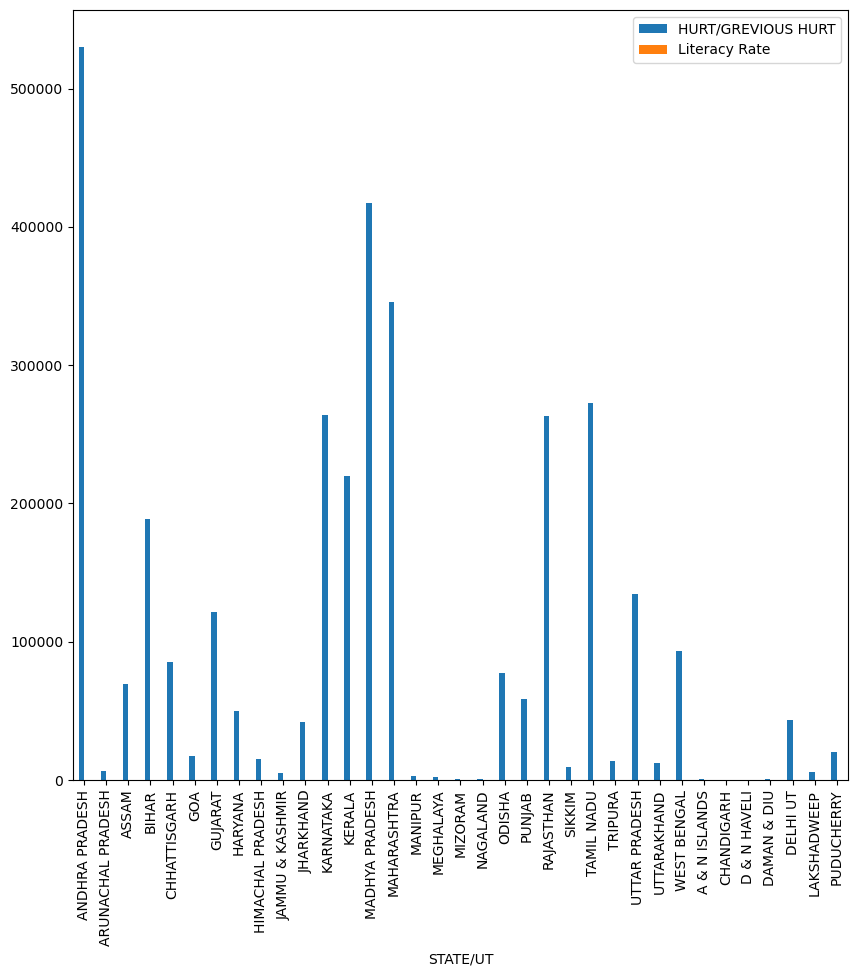

In [95]:
df.plot(x='STATE/UT', y=["HURT/GREVIOUS HURT",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

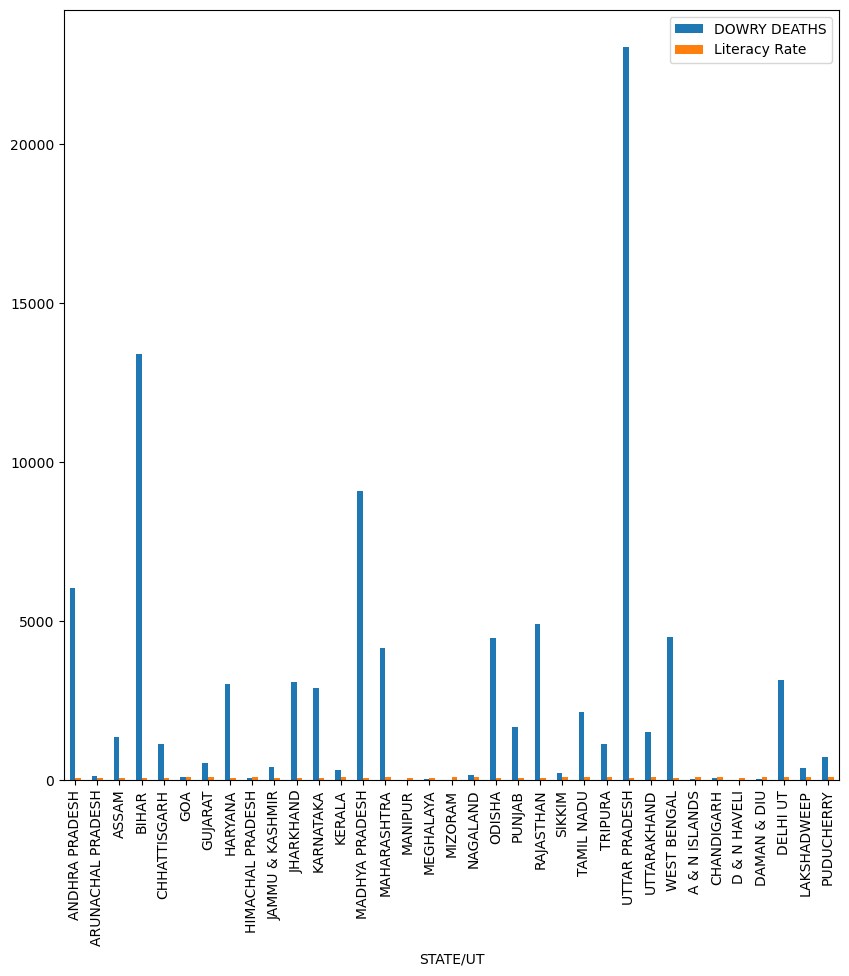

In [96]:
df.plot(x='STATE/UT', y=["DOWRY DEATHS",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

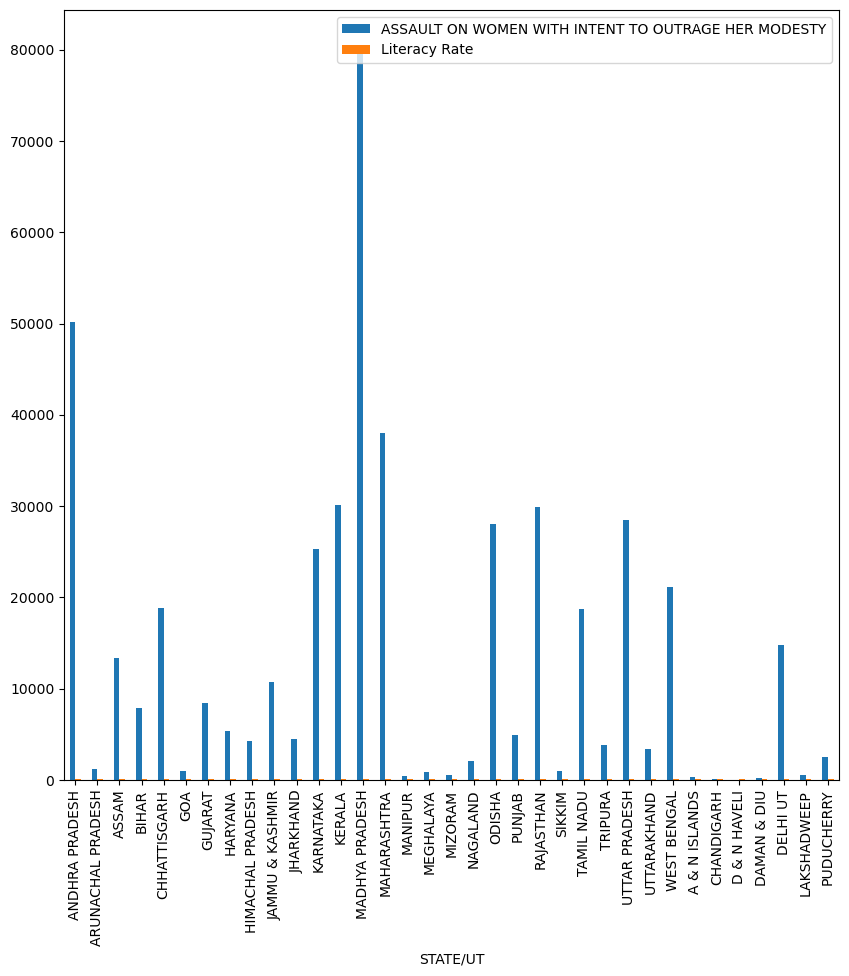

In [97]:
df.plot(x='STATE/UT', y=["ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

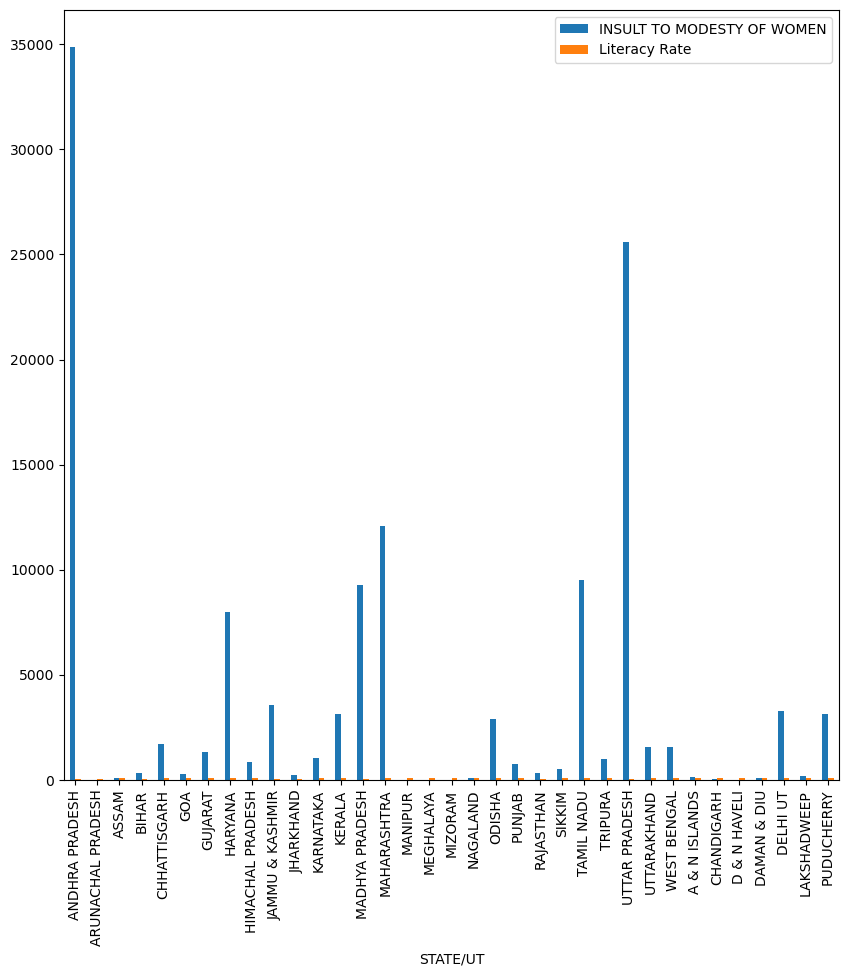

In [98]:
df.plot(x='STATE/UT', y=["INSULT TO MODESTY OF WOMEN",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

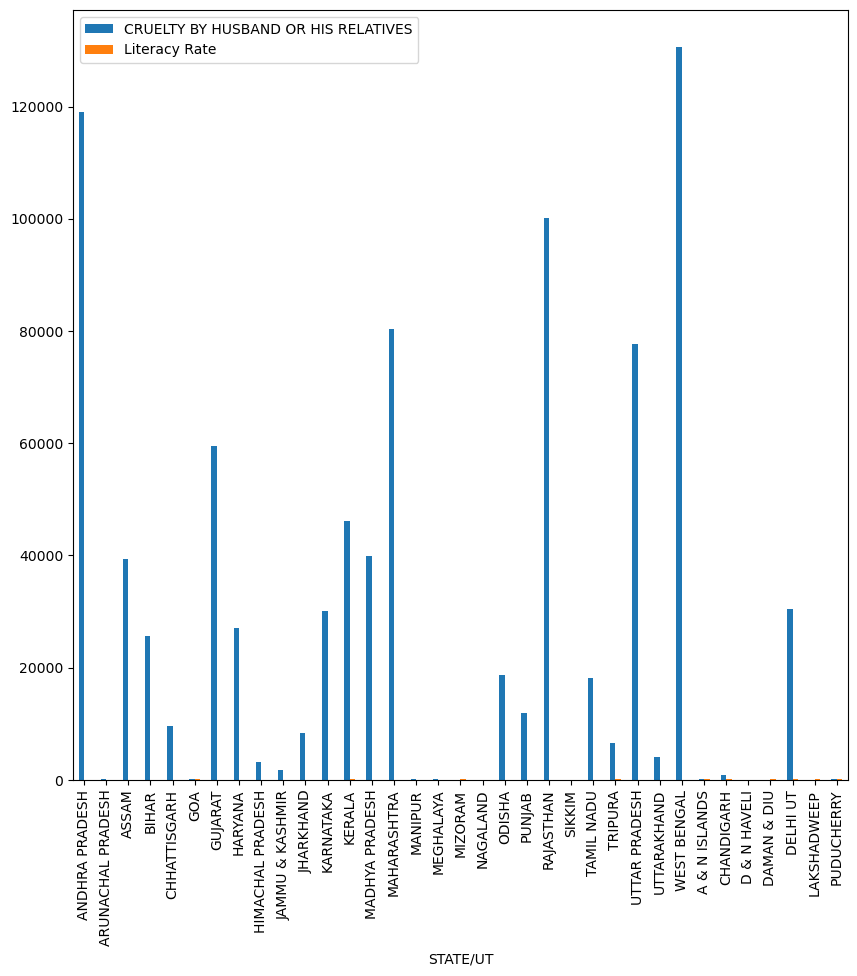

In [100]:
df.plot(x='STATE/UT', y=["CRUELTY BY HUSBAND OR HIS RELATIVES",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

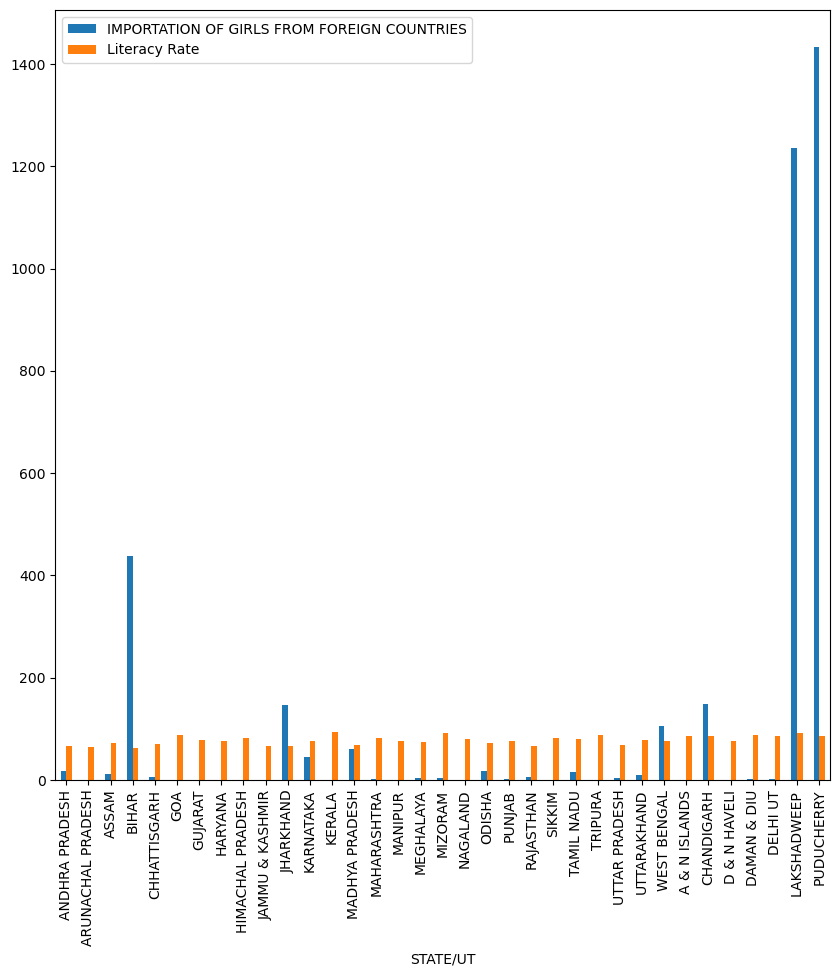

In [102]:
df.plot(x='STATE/UT', y=["IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

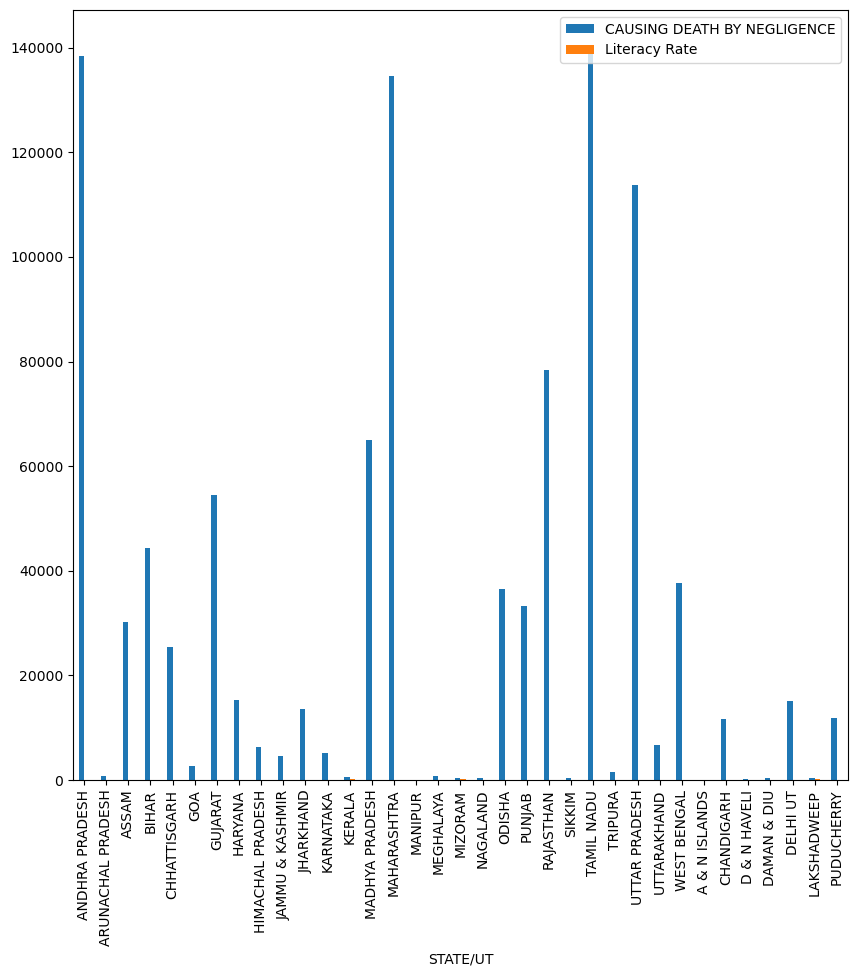

In [104]:
df.plot(x='STATE/UT', y=["CAUSING DEATH BY NEGLIGENCE",'Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

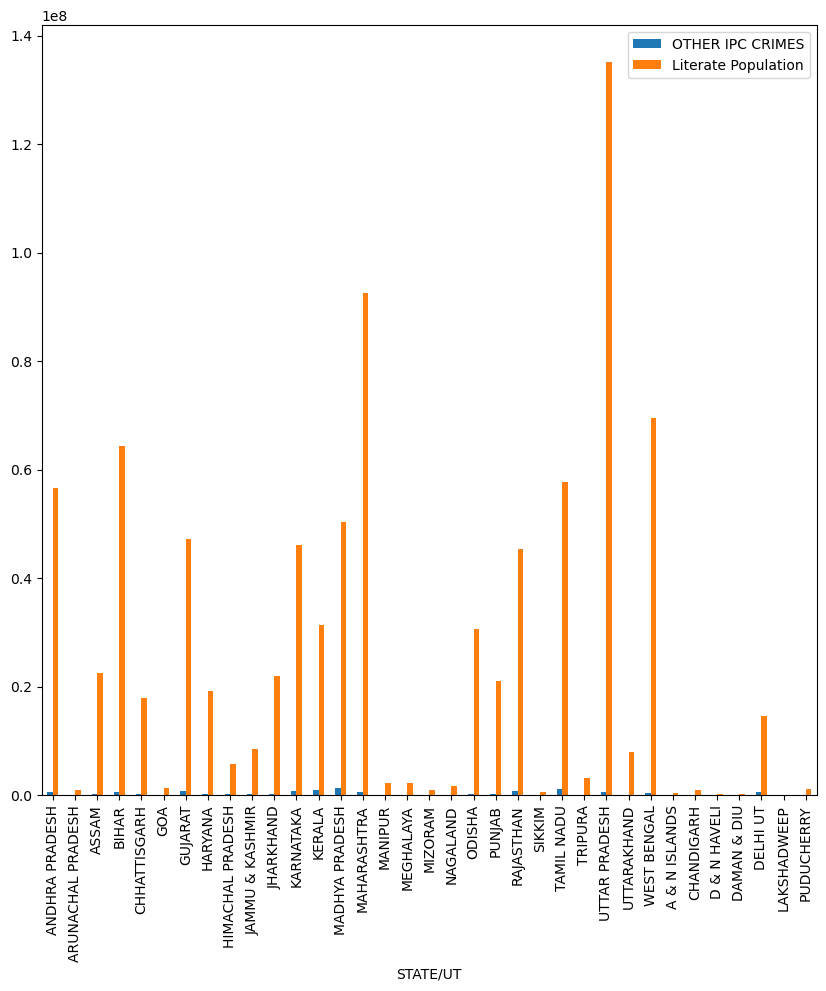

In [108]:
df.plot(x='STATE/UT', y=["OTHER IPC CRIMES",'Literate Population'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

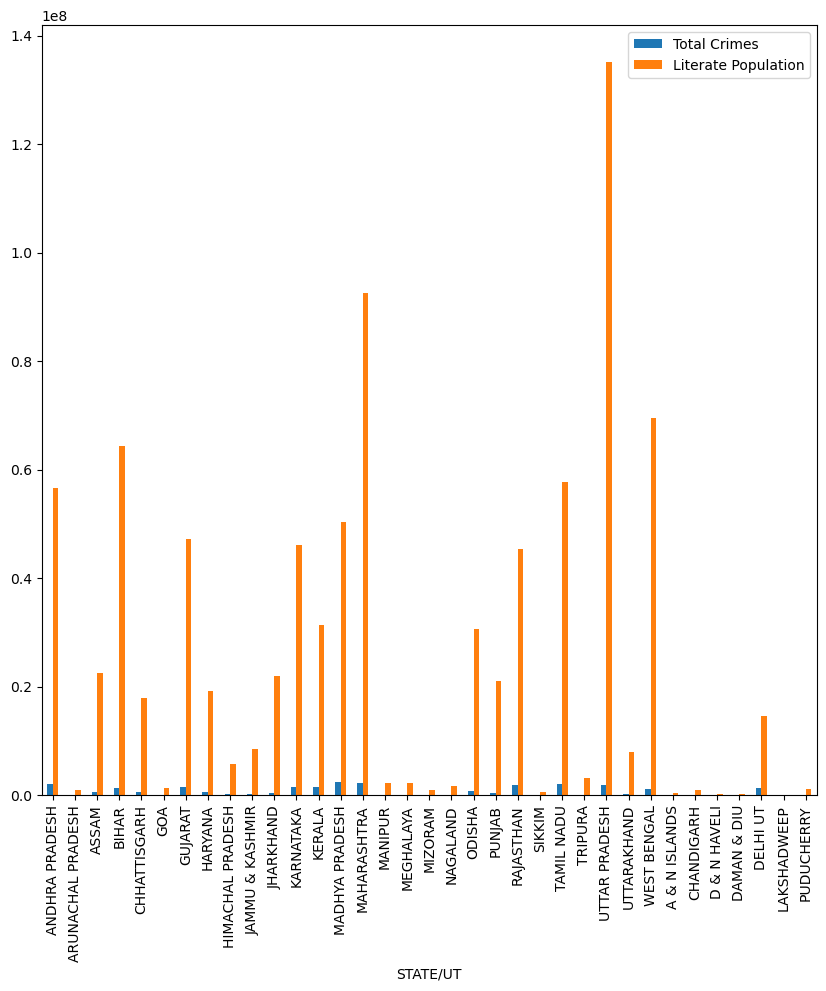

In [109]:
df.plot(x='STATE/UT', y=['Total Crimes','Literate Population'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

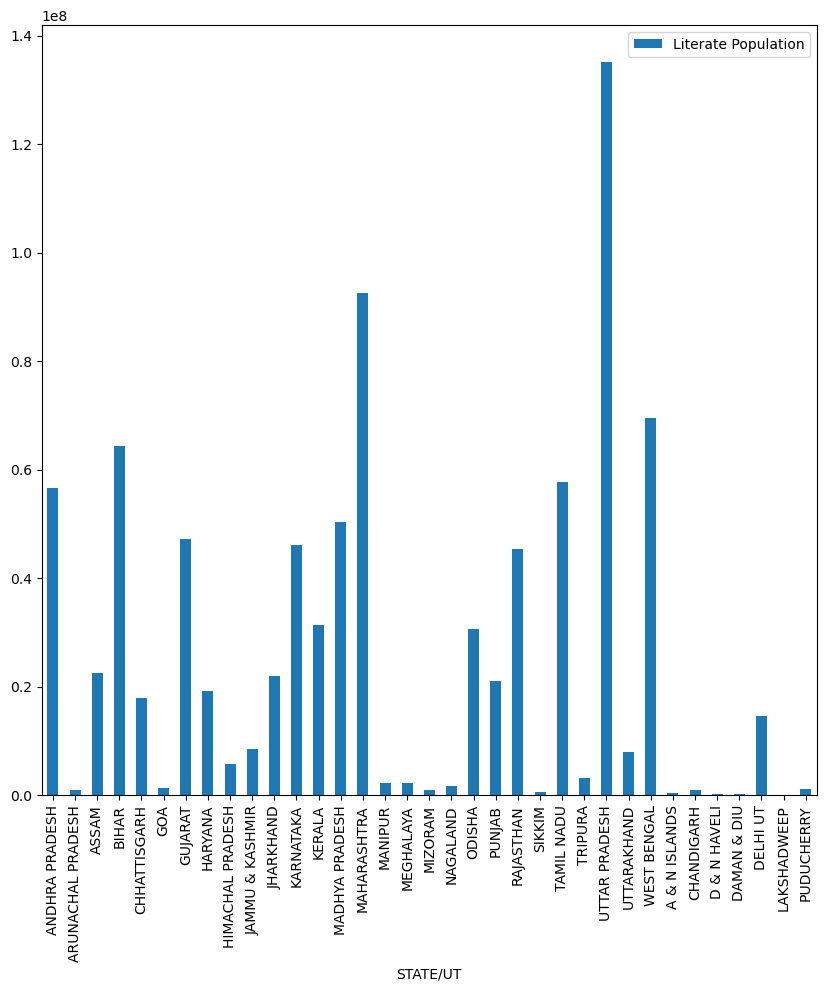

In [110]:
#comparision of literacy rate vs states
df.plot(x='STATE/UT', y=['Literate Population'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

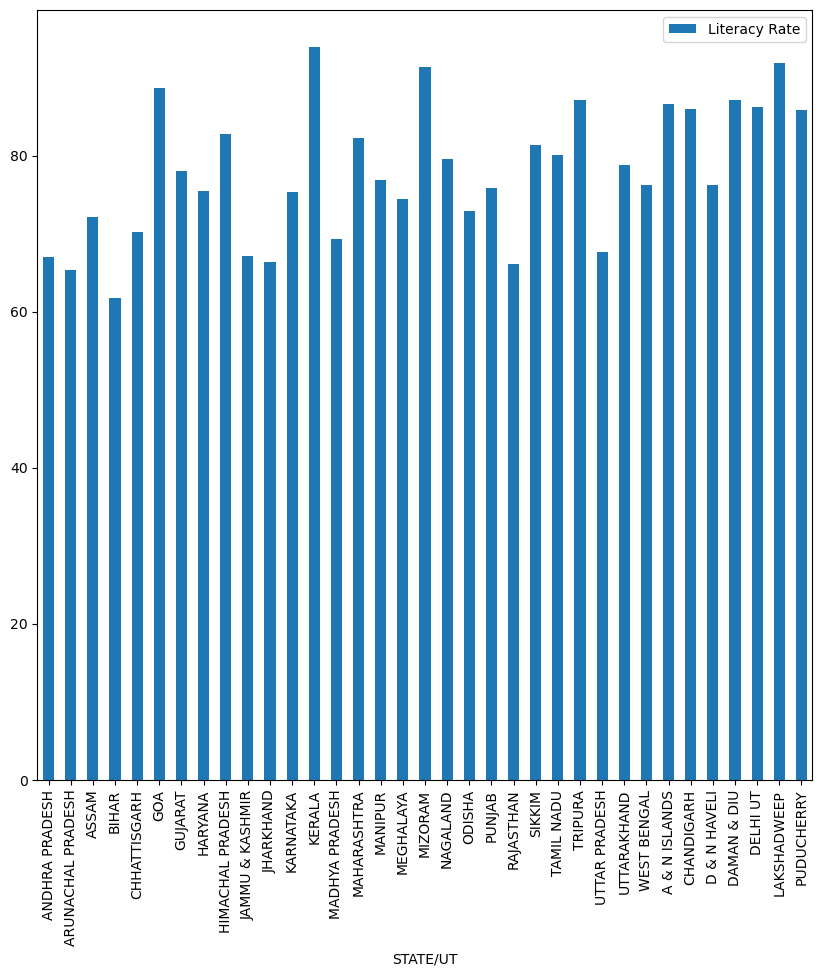

In [111]:
#Comparision of literacy rate and state
df.plot(x='STATE/UT', y=['Literacy Rate'], kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()

In [112]:
#In above all graph it have been observed that with higher literacy rate crime rate will be reduced


In [ ]:
#2.3 2.3	Analysis of year-on-year total crime rate.